# 1 - INTRODUCTION


**Nama  : Enggar Kristian** 

**Batch : FTDS - 012** 

**Dataset   : credit_card_default**

**Objective : Buatlah model Classification untuk memprediksi default_payment_next_month menggunakan dataset yang sudah kalian simpan.**

**Milestone 01 phase-1** 




# 2 - IMPORT LIBRARIES

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import joblib

import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

# For Regression Problems
from sklearn.linear_model import LinearRegression

# For Classification Problems
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from collections import Counter


# Evaluate Classification Models
from sklearn.metrics import classification_report, roc_auc_score, auc, RocCurveDisplay, roc_curve, accuracy_score
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix,recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Censoring Outliers
from feature_engine.outliers import Winsorizer

# import gridsearchcv
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold



# 3 - DATA LOADING

Dataset diambil dari Google Cloud platform dari data set ml_datasets database bernama census_adult_income yang di query dengan kriteria sebagai berikut:
- Pilih HANYA kolom limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month.
- Limit jumlah data menjadi sebanyak nomor batch dikali dengan tahun lahir kalian.  Batch 11 dan lahir tahun 1998, 11 x 1998 = 21978. tetapi baris di awal hanya 2965 baris maka tidak akan berkurang jumlahnya karena batas limit 21978 merupakan batas maksimal.

In [132]:
# Dengan Query sebagai berikut:

# SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month
# from `bigquery-public-data.ml_datasets.credit_card_default`
# limit 21978;

## Description

Dataset is taken from [Google Cloud Platform BigQuery](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=credit_card_default&page=table)

Context:

This dataset contains the credit card default for clients in Taiwan from April 2005 to September 2005

1) `limit_balance`: Amount of given credit in NT dollars (includes individual and family/supplementary credit
2) `sex`: Gender (1=male, 2=female)
3) `education_level`: Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
4) `marital_status`: Marital status (1=married, 2=single, 3=others)
5) `age`: Age in years
6) `pay_0`: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
7) `pay_2`: Repayment status in August, 2005 (scale same as above)
8) `pay_3`: Repayment status in July, 2005 (scale same as above)
9) `pay_4`: Repayment status in June, 2005 (scale same as above)
10) `pay_5`: Repayment status in May, 2005 (scale same as above)
11) `pay_6`: Repayment status in April, 2005 (scale same as above)
12) `bill_amt_1`: Amount of bill statement in September, 2005 (NT dollar)
13) `bill_amt_2`: Amount of bill statement in August, 2005 (NT dollar)
14) `bill_amt_3`: Amount of bill statement in July, 2005 (NT dollar)
15) `bill_amt_4`: Amount of bill statement in June, 2005 (NT dollar)
16) `bill_amt_5`: Amount of bill statement in May, 2005 (NT dollar)
17) `bill_amt_6`: Amount of bill statement in April, 2005 (NT dollar)
18) `pay_amt_1`: Amount of previous payment in September, 2005 (NT dollar)
19) `pay_amt_2`: Amount of previous payment in August, 2005 (NT dollar)
20) `pay_amt_3`: Amount of previous payment in July, 2005 (NT dollar)
21) `pay_amt_4`: Amount of previous payment in June, 2005 (NT dollar)
22) `pay_amt_5`: Amount of previous payment in May, 2005 (NT dollar)
23) `pay_amt_6`: Amount of previous payment in April, 2005 (NT dollar)
24) `default_payment_next_month`: Default payment (1=yes, 0=no)

### Objective

- To create a model to predict `default_payment_next_month`

### Problem Statement

- What features are going to be useful as predictors?

### Additional Information
We have more details of the dataset in this [discussion](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/discussion/34608)
- `education_level`: Education Level (1=graduate school, 2=university, 3=high school, 0,4,5,6=others)
- `marital_status`: Marital status (1=married, 2=single, 3=divorce, 0=others)
- `pay_0` to `pay_6`: (2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.)

In [133]:
data = pd.read_csv('h8dsft_P1M1_enggar_kristian.csv')

data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


In [134]:
data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1
2964,20000.0,2,1,2,24.0,-1.0,-1.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [135]:
data.shape

(2965, 24)

Datanya sebesar 2965 baris dan 24 kolom

In [136]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_0,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [138]:
# Salin data yang akan dimodifikasi
data_copy = data.copy() 

In [139]:
# Query education_level yang tidak ada keterangannya adalah 0
data_copy[data_copy['education_level']==0]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
1573,100000.0,1,0,2,37.0,0.0,0.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2099,250000.0,1,0,1,35.0,-2.0,-2.0,-2.0,-2.0,-2,...,33604.0,0.0,1190.0,7783.0,12046.0,33718.0,0.0,1190.0,590.0,0


In [140]:
# Drop row
data_copy.drop([1573, 2099], axis=0, inplace=True)

In [141]:
# Check Value 0 after dropping
data_copy[data_copy['education_level']==0]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month


Menghilangkan kolom unique 0 pada education_level karena pada keterangannya tidak terdefinisikan

# 4 - EXPLORATORY DATA ANALYSIS (EDA)

In [142]:
data_copy['default_payment_next_month'].unique()

array([0, 1], dtype=int64)

Mengetahui isi unique pada kolom yang kan diprediksi pada kasus kali ini yaitu kolom 'default_payment_next_month' yang terdapat 2 kategory yaitu '0' dan '1' 

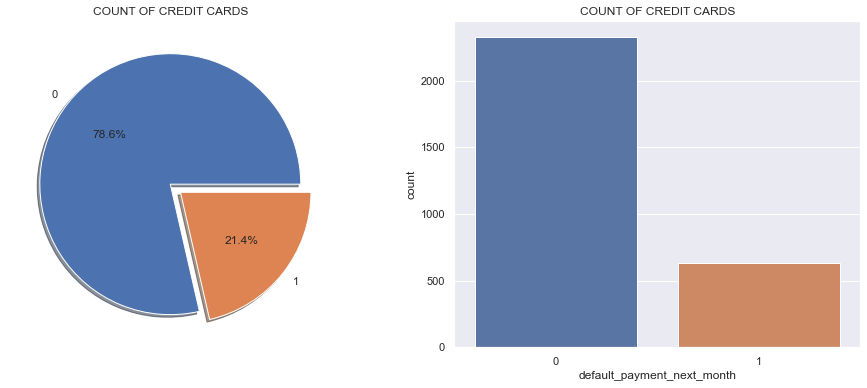

In [143]:
f,ax=plt.subplots(1,2,figsize=(16,6))
data['default_payment_next_month'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[1].set_title('COUNT OF CREDIT CARDS')
ax[0].set_title('COUNT OF CREDIT CARDS')
ax[0].set_ylabel('')
sns.countplot('default_payment_next_month',data=data,ax=ax[1])
ax[1].set_title('COUNT OF CREDIT CARDS')
plt.show()

In [144]:
data['default_payment_next_month'].value_counts()

0    2330
1     635
Name: default_payment_next_month, dtype: int64

Data target berjenis klasifikasi, yang memiliki ketidak seimbangan data terhadap nilai 0 dan 1, yang mana 0 persentase 78.6% lebih besar daripada 1 persentase 21.4% dengan nilai 2330 : 635.

In [145]:
# check the cardinality of each nominal and ordinal features after cleaning
for col in data.columns:
    if data[col].nunique() < 20:
        print(col, ':', data[col].nunique(), 'unique values, which contains', np.sort(data[col].unique()))

sex : 2 unique values, which contains [1 2]
education_level : 7 unique values, which contains [0 1 2 3 4 5 6]
marital_status : 4 unique values, which contains [0 1 2 3]
pay_0 : 11 unique values, which contains [-2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.]
pay_2 : 10 unique values, which contains [-2. -1.  0.  1.  2.  3.  4.  5.  6.  7.]
pay_3 : 9 unique values, which contains [-2. -1.  0.  2.  3.  4.  5.  6.  7.]
pay_4 : 10 unique values, which contains [-2. -1.  0.  2.  3.  4.  5.  6.  7.  8.]
pay_5 : 9 unique values, which contains [-2 -1  0  2  3  4  5  6  7]
pay_6 : 8 unique values, which contains [-2 -1  0  2  3  4  6  7]
default_payment_next_month : 2 unique values, which contains [0 1]


Design data cukup bagus dari deteksi cardinality yang tidak saling berkorelasi maka akan dipakai semua dalam training.

## Sex and Default

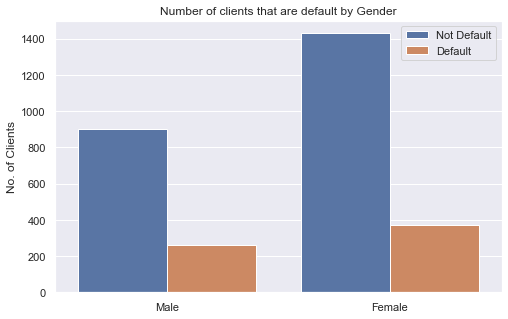

In [146]:
# plot number of clients that are default by gender
plt.figure(figsize=(8,5))
ax = sns.countplot(data=data_copy, x='sex', hue='default_payment_next_month')
plt.title('Number of clients that are default by Gender')
plt.xlabel(None)
plt.ylabel('No. of Clients')
plt.ylim(0, 1500)
plt.xticks([0, 1], ['Male', 'Female'])

plt.legend(labels=['Not Default', 'Default'])
plt.show()

Lebih banyak pelanggan perempuan yang gagal dalam membayar.

## Education Level and Default

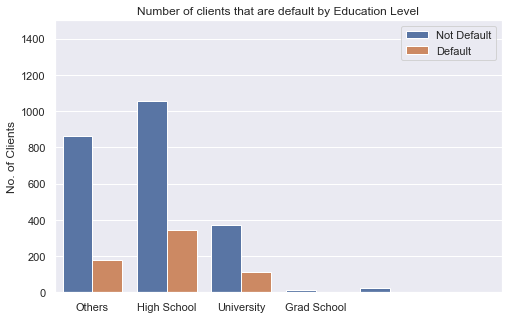

In [147]:
# plot number of clients that are default by education level
plt.figure(figsize=(8,5))
ax = sns.countplot(data=data_copy, x='education_level', hue='default_payment_next_month')
plt.title('Number of clients that are default by Education Level')
plt.xlabel(None)
plt.ylabel('No. of Clients')
plt.ylim(0, 1500)
plt.xticks([0, 1, 2, 3], ['Others', 'High School', 'University', 'Grad School'])

plt.legend(labels=['Not Default', 'Default'])
plt.show()

Dari segi pendidikan juga menunjukka bahwa behavior seseorang yang memiliki pendidikan tinggi hingga jenjang pascasarjana ke atas, peluang gagal kecil, dan dari grafik di atas pelanggan yang berpotensi besar gagal untuk membayar bulan depan berpendidikan akhir paling banyak High School.

## Marital Status

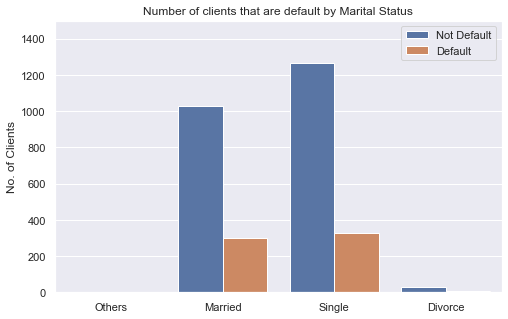

In [148]:
# plot number of clients that are default by marital status
plt.figure(figsize=(8,5))
ax = sns.countplot(data=data_copy, x='marital_status', hue='default_payment_next_month')
plt.title('Number of clients that are default by Marital Status')
plt.xlabel(None)
plt.ylabel('No. of Clients')
plt.ylim(0, 1500)
plt.xticks([0, 1, 2, 3], ['Others', 'Married', 'Single', 'Divorce'])

plt.legend(labels=['Not Default', 'Default'])
plt.show()

Client terbanyaknya berstatus single dan menikah

## Limit Balance

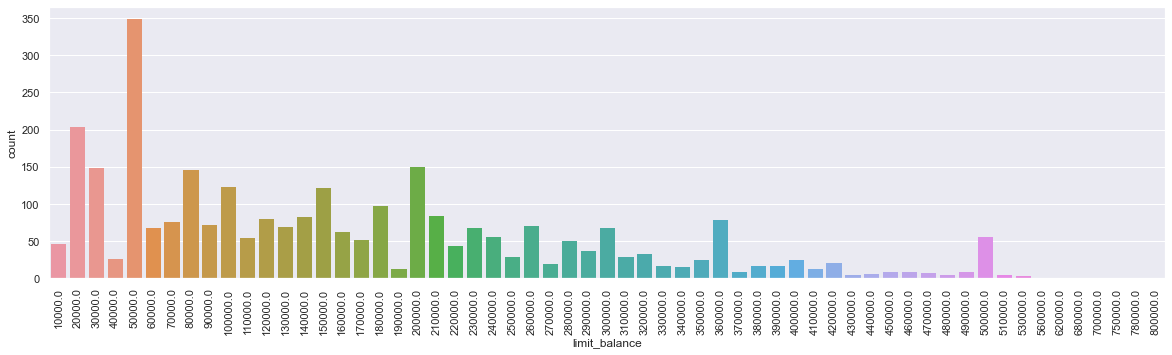

In [149]:
balance_plot = data['limit_balance'].sort_values(ascending=True).reset_index()
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data=balance_plot, x='limit_balance', linewidth=0)
plt.xticks(rotation=90)
plt.show()

pada hasil di atas mengenai grafik dari limit_balance membuktikan bahwa client kita terbanyak memiliki limit 50000.

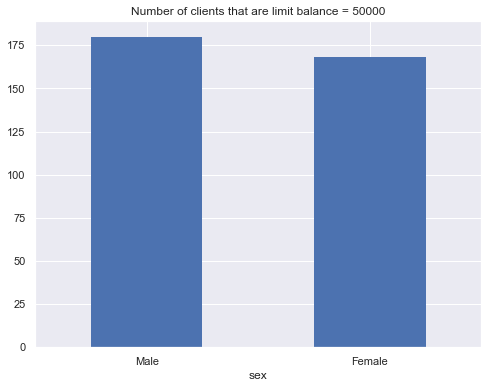

In [150]:
sns.set(rc={'figure.figsize':(8,6)})
balance_plot1 = data_copy[data_copy['limit_balance'] == 50000.0][['sex']].value_counts().plot(kind='bar', linewidth=0)
plt.title('Number of clients that are limit balance = 50000')
plt.xticks(rotation=0)
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()



Namun kalo kita bagi menjadi 2 gender, laki-laki yang lebih banyak memiliki limit_balance = 50000 dibanding perempuan.

### Perbandingan Limit Balance Berdasarkan Gender dan Education level

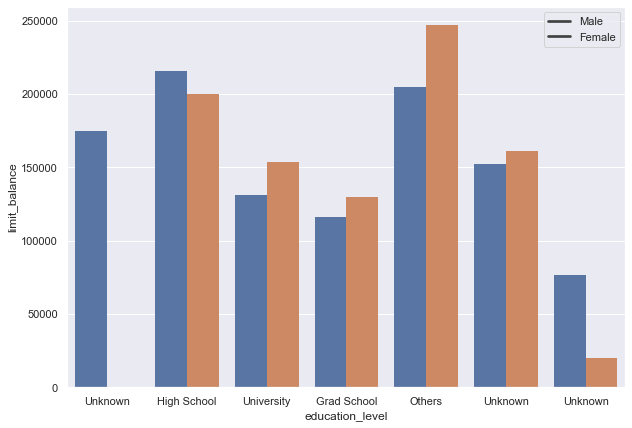

In [151]:
gender_plot = data.groupby(['education_level','sex'])[['limit_balance']].mean().reset_index()
sns.set(rc={'figure.figsize':(10,7)})
sns.barplot(data=gender_plot, x='education_level', y='limit_balance', hue='sex', ci =0, linewidth=0)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Unknown', 'High School', 'University', 'Grad School', 'Others',  'Unknown', 'Unknown'])
plt.legend(labels=['Male', 'Female'])


Jika dilihat dari hasil di atas menyatakan bahwa limit balance terbesar dimiliki oleh client yang education level Others, tidak dijelaskan spesifiknya kemungkinan lebih dari bachelor dan kurang dari high school pendidikannya.

## Korelasi

<AxesSubplot:>

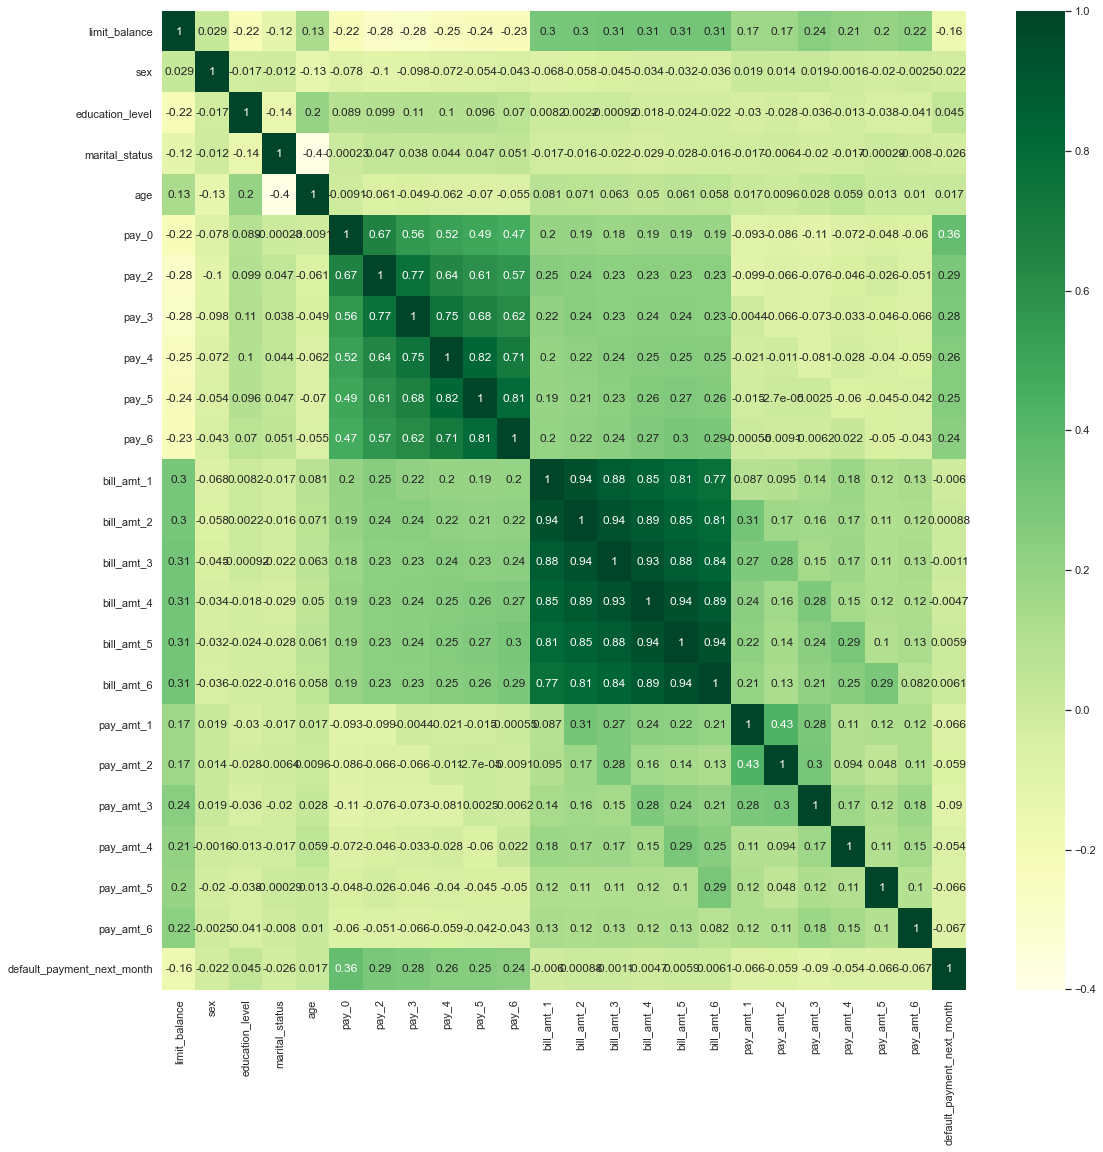

In [152]:
sns.set(rc={'figure.figsize':(18,18)})
sns.heatmap(data=data.corr(), annot=True, cmap='YlGn')

Jika dilihat pada grafik heatmap banyak dari kolom dataset yang berkorelasi kecil terhadap target default_payment_next_month yang mana hanya yang berkorelasi besar berada pada kolom pay_0, pay_2, pay_3, pay_4, pay_5, dan pay_6.

# 5 - DATA PREPROCESSING

## Get Data for Model Inference

In [153]:
# Definisikan random state
random_state = 29


In [154]:
# Get Data for Model Inference

data_inf = data_copy.sample(100, random_state=random_state)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
1063,440000.0,2,1,1,35.0,0.0,0.0,0.0,0.0,0,...,109705.0,111202.0,116169.0,10000.0,5000.0,5000.0,7126.0,10000.0,10000.0,0
2911,300000.0,1,1,1,38.0,-1.0,-1.0,-1.0,-1.0,-2,...,-627.0,-918.0,-1209.0,200.0,600.0,0.0,0.0,0.0,1791.0,1
1597,80000.0,1,2,2,26.0,0.0,0.0,0.0,-2.0,-2,...,0.0,0.0,0.0,2850.0,0.0,0.0,0.0,0.0,0.0,0
1266,30000.0,1,2,1,48.0,0.0,0.0,0.0,0.0,0,...,29400.0,30000.0,0.0,1899.0,1400.0,1188.0,600.0,0.0,0.0,0
1355,140000.0,1,2,2,27.0,0.0,0.0,0.0,2.0,2,...,37167.0,41146.0,40332.0,1583.0,3400.0,0.0,4600.0,0.0,2000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,160000.0,2,2,1,25.0,4.0,3.0,2.0,0.0,0,...,99434.0,99527.0,16331.0,0.0,0.0,2321.0,432.0,546.0,550.0,0
925,380000.0,1,3,1,52.0,2.0,0.0,0.0,0.0,0,...,383319.0,385813.0,365587.0,15353.0,14219.0,15022.0,29000.0,0.0,27000.0,0
1327,40000.0,2,2,1,32.0,0.0,0.0,0.0,2.0,2,...,29107.0,29693.0,30456.0,2000.0,4110.0,1100.0,1200.0,1400.0,0.0,0
1996,170000.0,2,2,1,28.0,1.0,-2.0,-1.0,0.0,0,...,10257.0,20872.0,34403.0,0.0,9311.0,1257.0,10872.0,14003.0,1500.0,0


Membuat data inference dengan mengambil 100 data dari dataset asli.

In [155]:
# Remove Inference-Set from Dataset

data_train_test = data_copy.drop(data_inf.index)
data_train_test

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


Menghilangkan 100 baris data yang akan dijadikan inference, lalu tentu saja pada data asli shapenya akan berkurang 100 baris menjadi 2863 baris dan 24 kolom. 

In [156]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,440000.0,2,1,1,35.0,0.0,0.0,0.0,0.0,0,...,109705.0,111202.0,116169.0,10000.0,5000.0,5000.0,7126.0,10000.0,10000.0,0
1,300000.0,1,1,1,38.0,-1.0,-1.0,-1.0,-1.0,-2,...,-627.0,-918.0,-1209.0,200.0,600.0,0.0,0.0,0.0,1791.0,1
2,80000.0,1,2,2,26.0,0.0,0.0,0.0,-2.0,-2,...,0.0,0.0,0.0,2850.0,0.0,0.0,0.0,0.0,0.0,0
3,30000.0,1,2,1,48.0,0.0,0.0,0.0,0.0,0,...,29400.0,30000.0,0.0,1899.0,1400.0,1188.0,600.0,0.0,0.0,0
4,140000.0,1,2,2,27.0,0.0,0.0,0.0,2.0,2,...,37167.0,41146.0,40332.0,1583.0,3400.0,0.0,4600.0,0.0,2000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,160000.0,2,2,1,25.0,4.0,3.0,2.0,0.0,0,...,99434.0,99527.0,16331.0,0.0,0.0,2321.0,432.0,546.0,550.0,0
96,380000.0,1,3,1,52.0,2.0,0.0,0.0,0.0,0,...,383319.0,385813.0,365587.0,15353.0,14219.0,15022.0,29000.0,0.0,27000.0,0
97,40000.0,2,2,1,32.0,0.0,0.0,0.0,2.0,2,...,29107.0,29693.0,30456.0,2000.0,4110.0,1100.0,1200.0,1400.0,0.0,0
98,170000.0,2,2,1,28.0,1.0,-2.0,-1.0,0.0,0,...,10257.0,20872.0,34403.0,0.0,9311.0,1257.0,10872.0,14003.0,1500.0,0


## Splitting Dataset

In [157]:
# Split antara `X` (Features) dan `y` (Target)

X = data_train_test.drop('default_payment_next_month', axis=1)
y = data_train_test['default_payment_next_month']
y

0       0
1       0
2       0
3       0
4       0
       ..
2858    0
2859    0
2860    0
2861    1
2862    0
Name: default_payment_next_month, Length: 2863, dtype: int64

## SMOTE

Rebalancing imbalance data target

In [158]:
# Definition for rebalancing data
smote=SMOTE(k_neighbors=2, random_state=random_state)
X_res,y_res =smote.fit_resample(X,y)

In [159]:
X_res.shape,y_res.shape

((4502, 23), (4502,))

In [160]:
print(f"Orignal Dataset Shape {Counter(y)}")
print(f"Resampled Dataset Shape {Counter(y_res)}")

Orignal Dataset Shape Counter({0: 2251, 1: 612})
Resampled Dataset Shape Counter({0: 2251, 1: 2251})


Terlihat sudah direbalancing data target yang mana 50:50 jumlahnya, ini berguna untuk train pemodelan. Tetapi tidak untuk data set aslinya karna ini hanya rekayasa untuk pemodelan

In [161]:
# Split antara Train-set dan Test-set

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.33, random_state=2)
print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)

Train Size : (3016, 23)
Test Size : (1486, 23)


Jika sudah displit dengan test_size = 0.33, dan random_state = 2 dan sudah rebalancing , Maka akan didapatkan Train Size = 3601, 6 dan Test Size  = 901, 13

## Handling Missing Value

In [162]:
# Check Missing Values

X_train.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [163]:
# Check Missing Values as Percentage to Total Data

X_train.isnull().mean()

limit_balance      0.0
sex                0.0
education_level    0.0
marital_status     0.0
age                0.0
pay_0              0.0
pay_2              0.0
pay_3              0.0
pay_4              0.0
pay_5              0.0
pay_6              0.0
bill_amt_1         0.0
bill_amt_2         0.0
bill_amt_3         0.0
bill_amt_4         0.0
bill_amt_5         0.0
bill_amt_6         0.0
pay_amt_1          0.0
pay_amt_2          0.0
pay_amt_3          0.0
pay_amt_4          0.0
pay_amt_5          0.0
pay_amt_6          0.0
dtype: float64

Terlihat bahwa dari semua kolom pada Dataframe tidak memiliki missing values

## Handling Outliers

### Identify variable distribution

In [164]:
# Fungsi untuk membuat histogram dan boxplot
# Fungsi ini diambil dari dataframe (data) dan variable yang akan diambil nantinya.
# Hanya kolom numerik yang akan dihandling outliernya kali ini

def diagnostic_plots(data_copy, variable):
    plt.figure(figsize=(16,4))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(data_copy[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=data_copy[variable])
    plt.title('Boxplot')

    plt.show()

Distribusi limit_balance


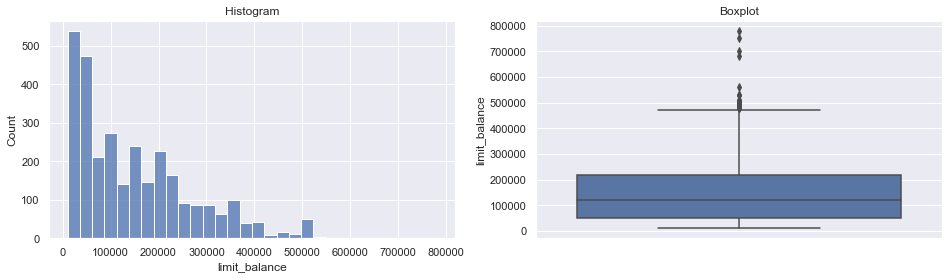

Skewness Value :  1.0763745455291

Distribusi sex


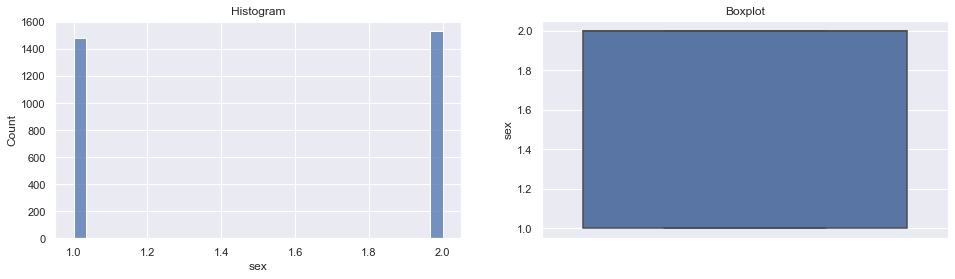

Skewness Value :  -0.031850113412193355

Distribusi education_level


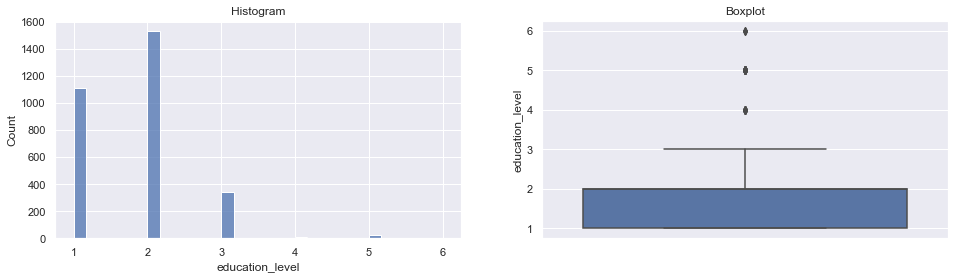

Skewness Value :  1.014547037007789

Distribusi marital_status


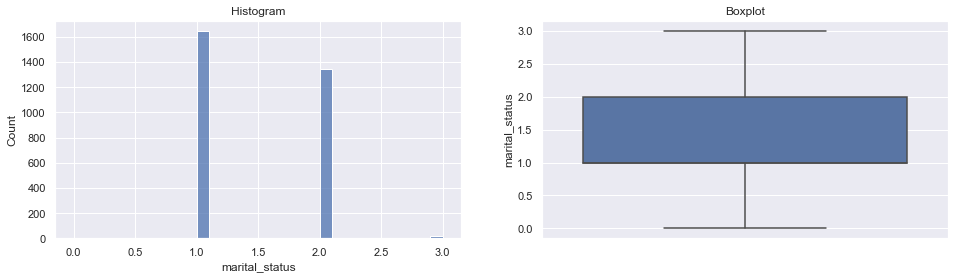

Skewness Value :  0.2994684777265125

Distribusi age


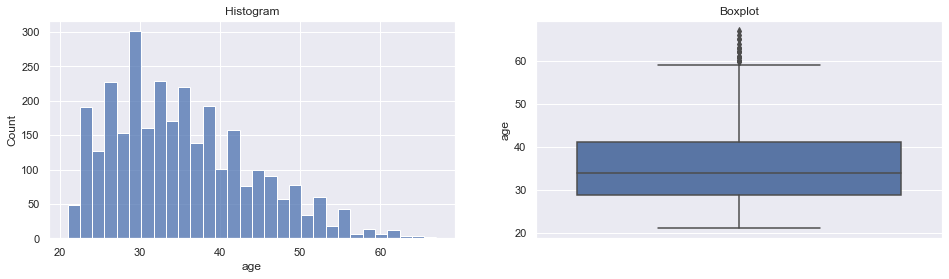

Skewness Value :  0.7022112675423514

Distribusi pay_0


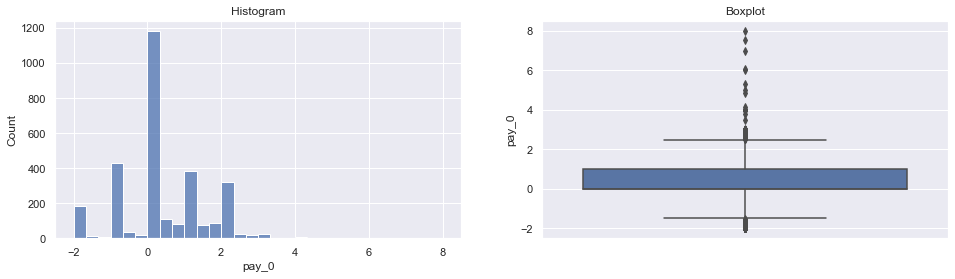

Skewness Value :  0.46794302624791256

Distribusi pay_2


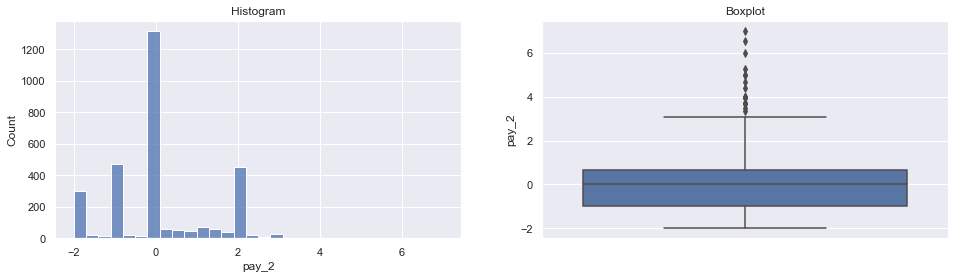

Skewness Value :  0.4741939824059044

Distribusi pay_3


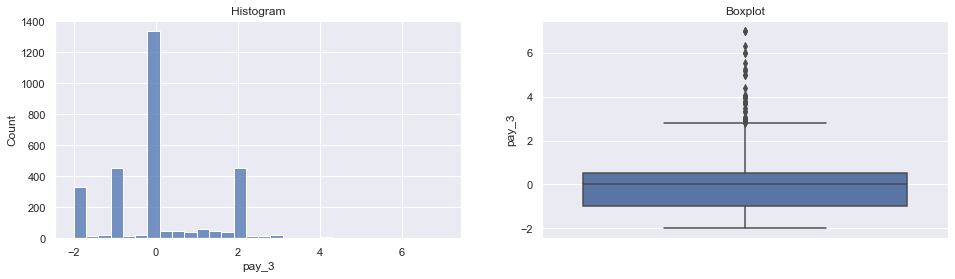

Skewness Value :  0.5792887763366636

Distribusi pay_4


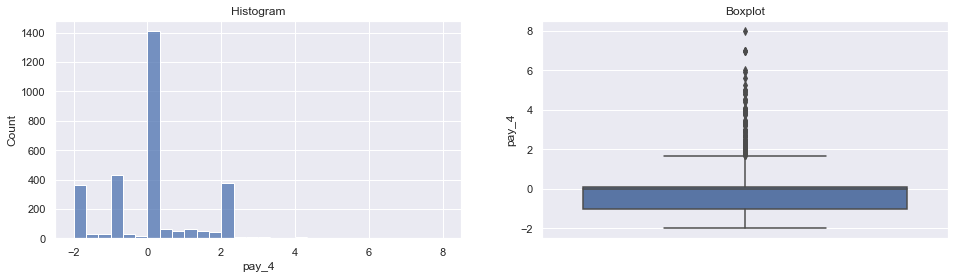

Skewness Value :  0.7899136498533542

Distribusi pay_5


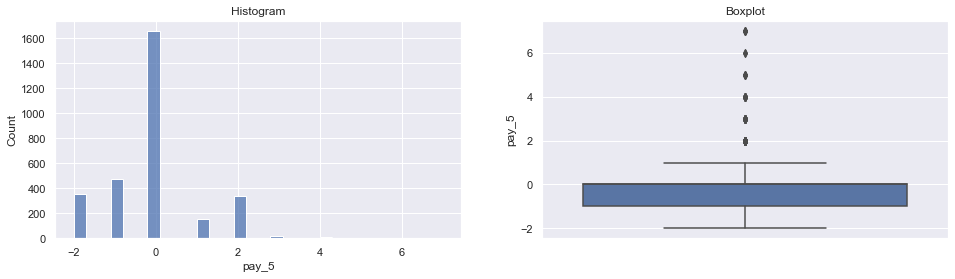

Skewness Value :  0.8789086005593096

Distribusi pay_6


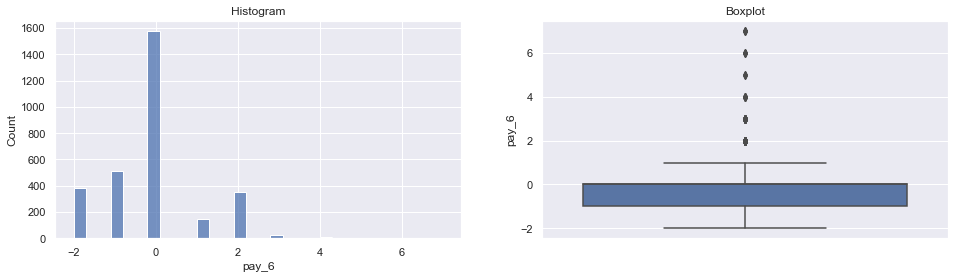

Skewness Value :  0.8150097791794093

Distribusi bill_amt_1


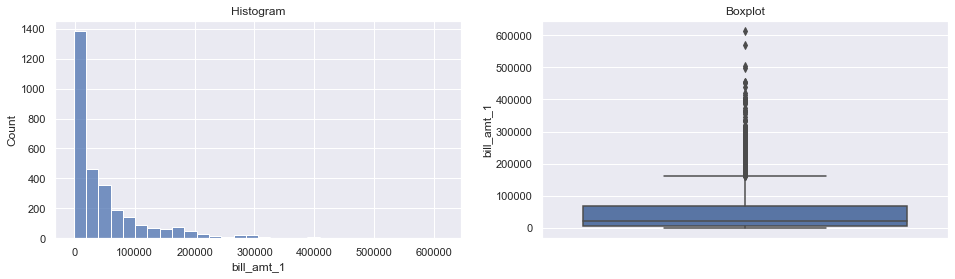

Skewness Value :  2.508575288372232

Distribusi bill_amt_2


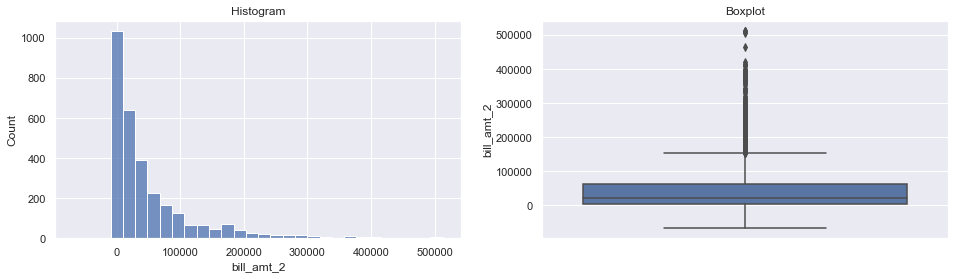

Skewness Value :  2.4563876891969816

Distribusi bill_amt_3


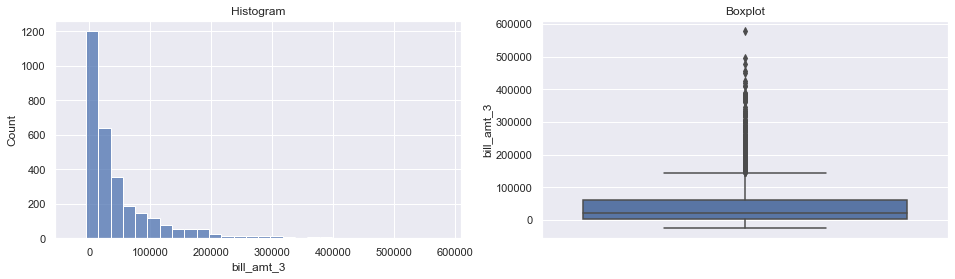

Skewness Value :  2.5714788179416512

Distribusi bill_amt_4


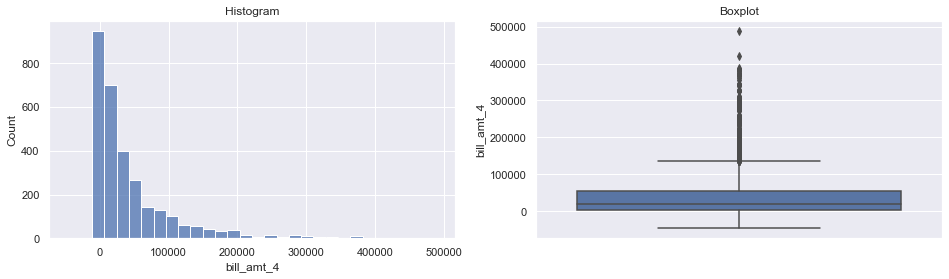

Skewness Value :  2.5197688187419516

Distribusi bill_amt_5


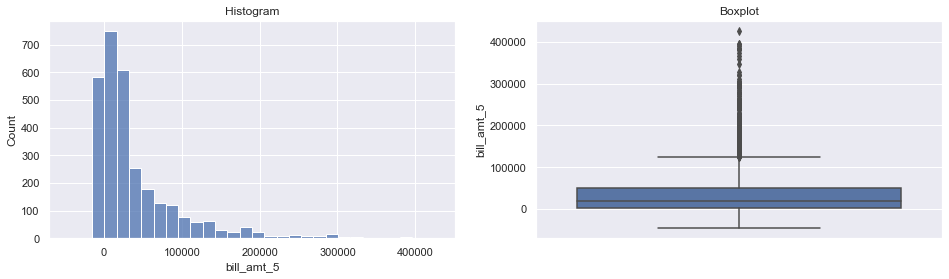

Skewness Value :  2.4933838083136086

Distribusi bill_amt_6


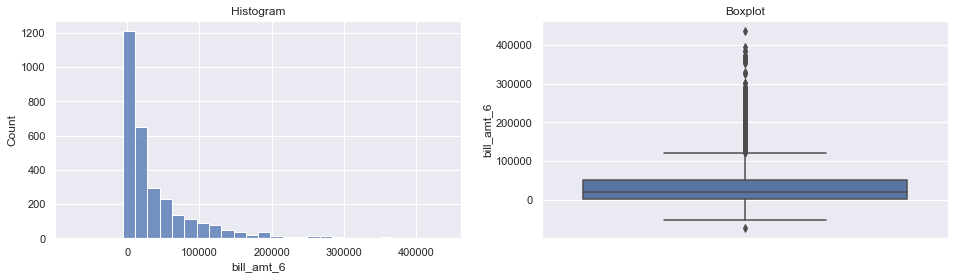

Skewness Value :  2.5217431833354884

Distribusi pay_amt_1


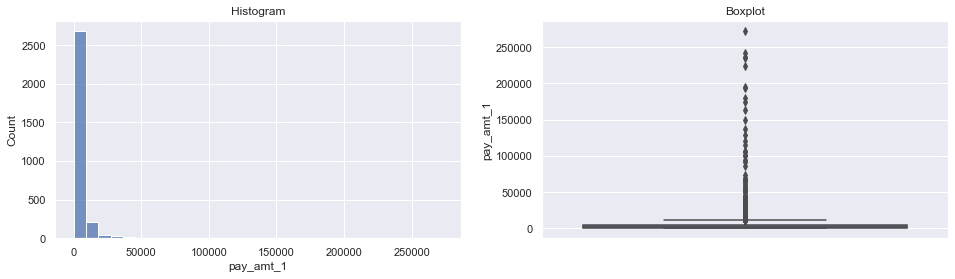

Skewness Value :  10.477537452909482

Distribusi pay_amt_2


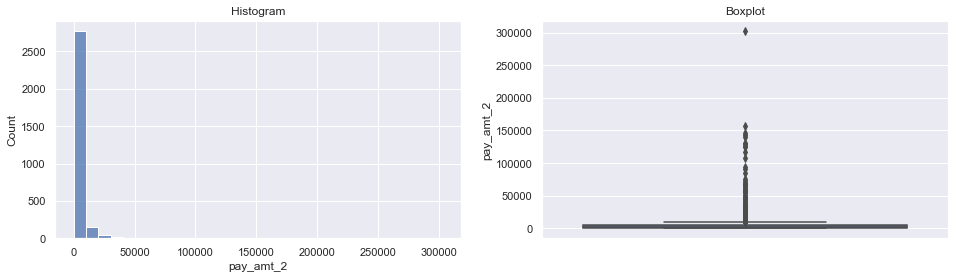

Skewness Value :  11.214533945287421

Distribusi pay_amt_3


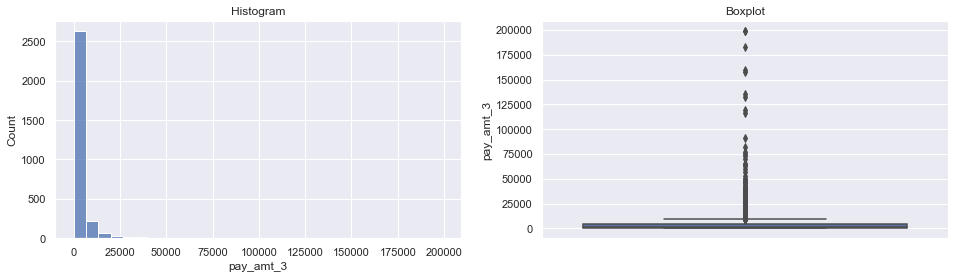

Skewness Value :  10.122469259641784

Distribusi pay_amt_4


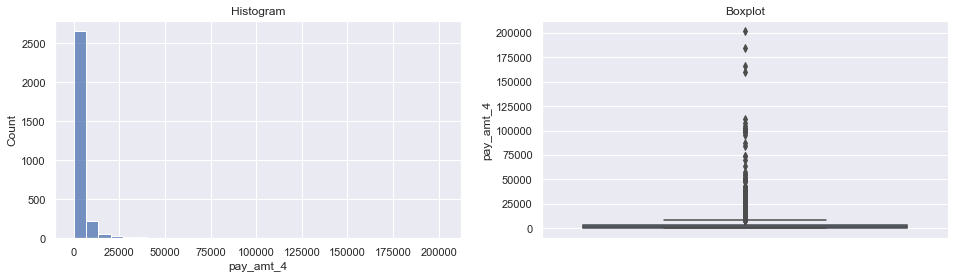

Skewness Value :  9.211348064130323

Distribusi pay_amt_5


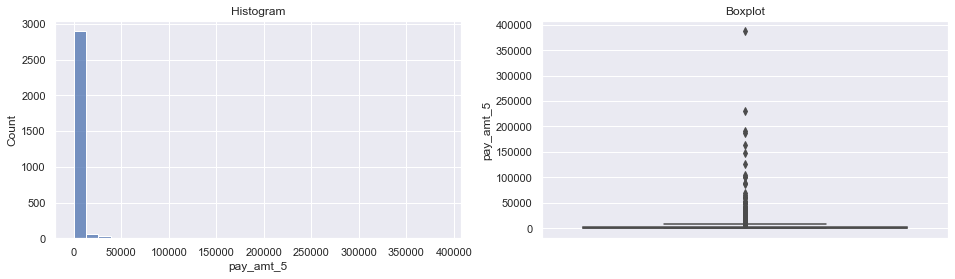

Skewness Value :  16.075459422475397

Distribusi pay_amt_6


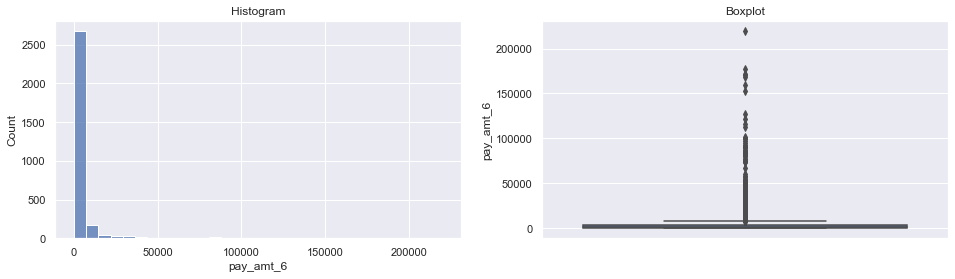

Skewness Value :  7.7011888418200956



In [165]:
# Kolom numeriknya adalah age, education_num, capital_gain, capital_loss, hours_per_week  

for columns in X_train.columns:
    print(f'Distribusi {columns}')
    diagnostic_plots(X_train, columns)
    print('Skewness Value : ', X_train[columns].skew())
    print('')


Kita tahu bahwa rules skewness sebagai berikut:
- Jika skewness di antara -0.5 dan 0.5, data termasuk *fairly symmetrical* tidak dihandle outliernya.
- Jika skewness di antara -1 dan -0.5 atau di antara 0.5 dan 1, data termasuk *moderately skewed* akan dilakukan capping.
- Jika skewness di bawah dari -1 atau di atas dari 1, maka data termasuk ekstrim *highly skewed* tidak akan dicapping karena akan mempengaruhi data yang akan ditrain, tetapi akan menggunakan scaler robust scaler yang mana akan sangat berguna untuk data outliers ekstrim.

Jenis distribusi pada dataset ini untuk kolom numerikal berikut adalah:

- Kolom limit_balance Skewness Value :  0.9979812489009502 termasuk jenis moderately skewed yang artinya tidak simetris distribusinya.
- Kolom sex Skewness Value : -0.4159570659293872 termasuk jenis fairly symmetrical yang artinya simetris distribusinya.
- Kolom education_level Skewness Value :  0.9305884036667876 termasuk jenis moderately skewed yang artinya tidak simetris distribusinya.
- Kolom marital_status Skewness Value :  -0.06813663830487403 termasuk jenis fairly symmetrical yang artinya simetris distribusinya.
- Kolom age Skewness Value :  0.7692409928276134 termasuk jenis moderately skewed yang artinya tidak simetris distribusinya.
- Kolom pay_0 Skewness Value :  0.8696618756055925 termasuk jenis moderately skewed yang artinya tidak simetris distribusinya.
- Kolom pay_2 Skewness Value :  0.8460714513147075 termasuk jenis moderately skewed yang artinya tidak simetris distribusinya.
- Kolom pay_3 Skewness Value :  0.820069128920416 termasuk jenis moderately skewed yang artinya tidak simetris distribusinya.
- Kolom pay_4 Skewness Value :  0.8960713377319166 termasuk jenis moderately skewed yang artinya tidak simetris distribusinya.
- Kolom pay_5 Skewness Value :  0.8399909041471271 termasuk jenis moderately skewed yang artinya tidak simetris distribusinya.
- Kolom pay_6 Skewness Value :  0.7427450151843388 termasuk jenis moderately skewed yang artinya tidak simetris distribusinya.
- Kolom bill_amt_1 Skewness Value :  2.393740990411802 termasuk jenis highly skewed yang artinya data ekstrim.
- Kolom bill_amt_2 Skewness Value :  2.4022923844367225 termasuk jenis highly skewed yang artinya data ekstrim.
- Kolom bill_amt_3 Skewness Value :  2.555131925093285 termasuk jenis highly skewed yang artinya data ekstrim.
- Kolom bill_amt_4 Skewness Value :  2.420298880481586 termasuk jenis highly skewed yang artinya data ekstrim.
- Kolom bill_amt_5 Skewness Value :  2.385642473847143 termasuk jenis highly skewed yang artinya data ekstrim.
- Kolom bill_amt_6 Skewness Value :  2.4340443244269583 termasuk jenis highly skewed yang artinya data ekstrim.
- Kolom pay_amt_1 Skewness Value :  12.108259248711862 termasuk jenis highly skewed yang artinya data ekstrim.
- Kolom pay_amt_2 Skewness Value :  31.019829391959515 termasuk jenis highly skewed yang artinya data ekstrim.
- Kolom pay_amt_3 Skewness Value :  8.328979994699104 termasuk jenis highly skewed yang artinya data ekstrim.
- Kolom pay_amt_4 Skewness Value :  8.10073547576697 termasuk jenis highly skewed yang artinya data ekstrim.
- Kolom pay_amt_5 Skewness Value :  11.749316907639912 termasuk jenis highly skewed yang artinya data ekstrim.
- Kolom pay_amt_6 Skewness Value :  7.490726124032638 termasuk jenis highly skewed yang artinya data ekstrim.



In [166]:
# Melakukan Censoring atau Capping untuk data outliers berjenis moderately skewed
winsoriser = Winsorizer(capping_method='iqr', tail='both', fold=1.5, 
                        variables=['limit_balance', 'education_level', 'age', 'pay_0','pay_2',
                        'pay_3','pay_4','pay_5','pay_6'])

winsoriser.fit(X_train)
X_train_cap = winsoriser.transform(X_train)

limit_balance - Before Capping


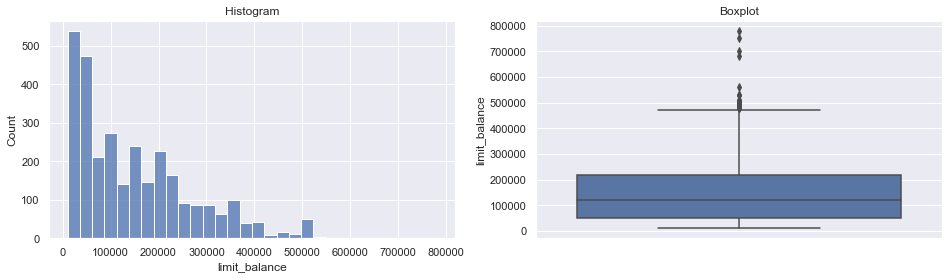

limit_balance - After Capping


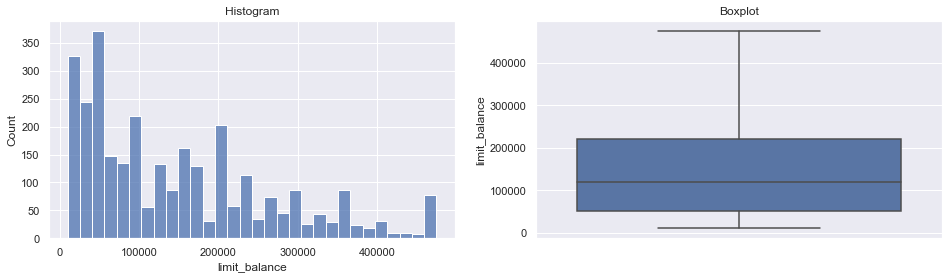

education_level - Before Capping


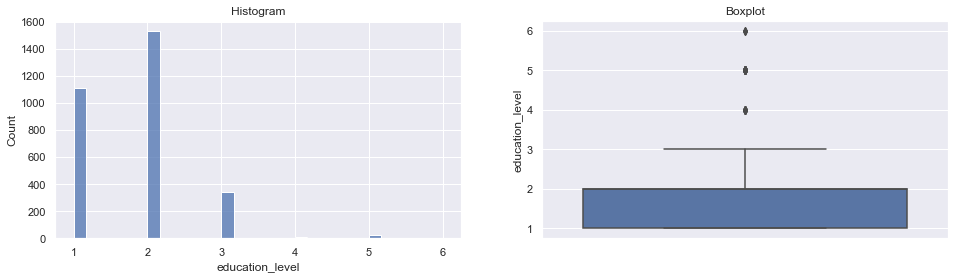

education_level - After Capping


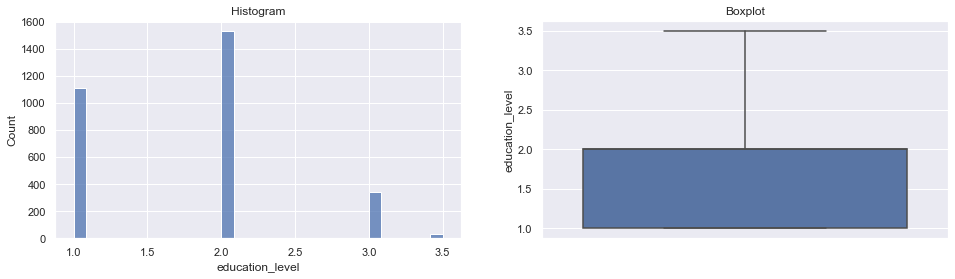

age - Before Capping


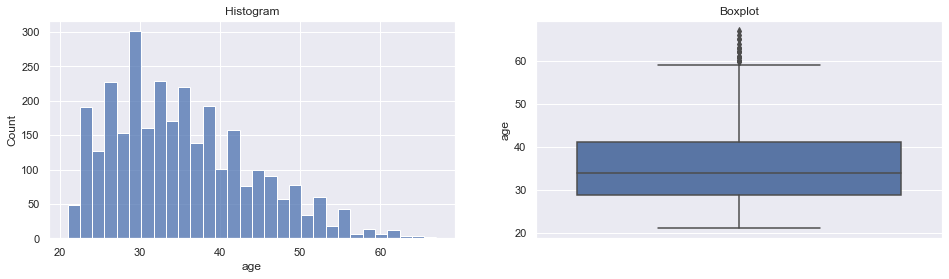

age - After Capping


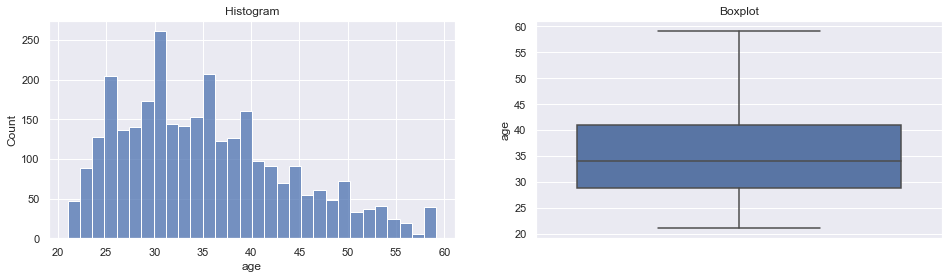

pay_0 - Before Capping


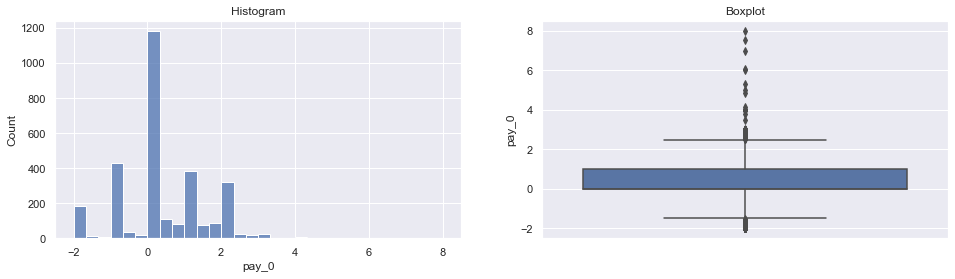

pay_0 - After Capping


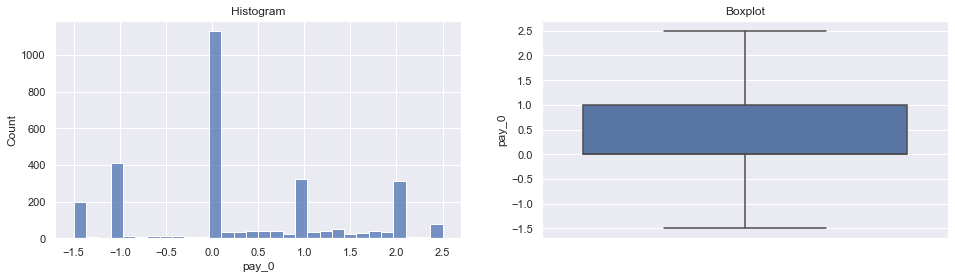

pay_2 - Before Capping


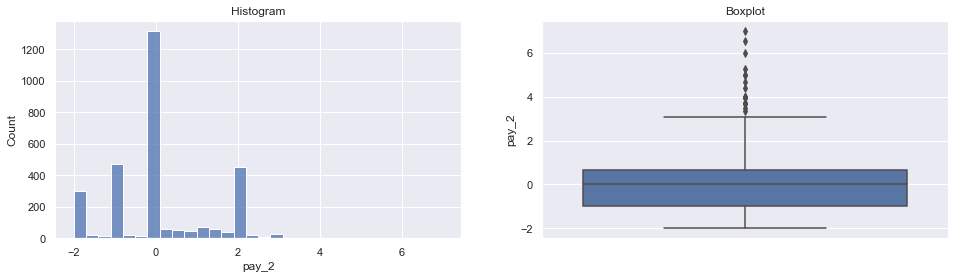

pay_2 - After Capping


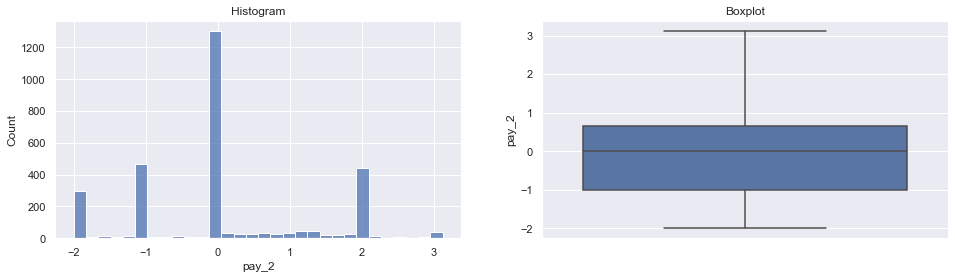

pay_3 - Before Capping


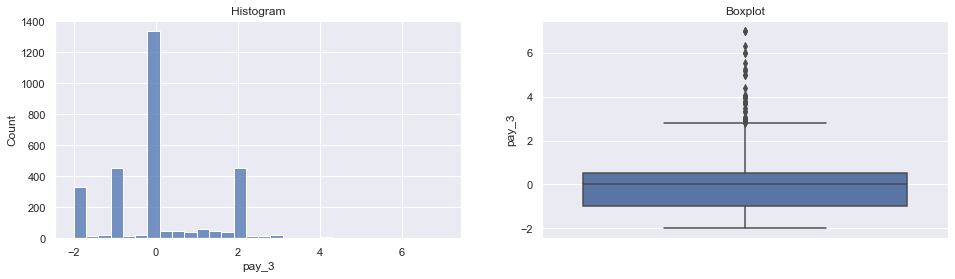

pay_3 - After Capping


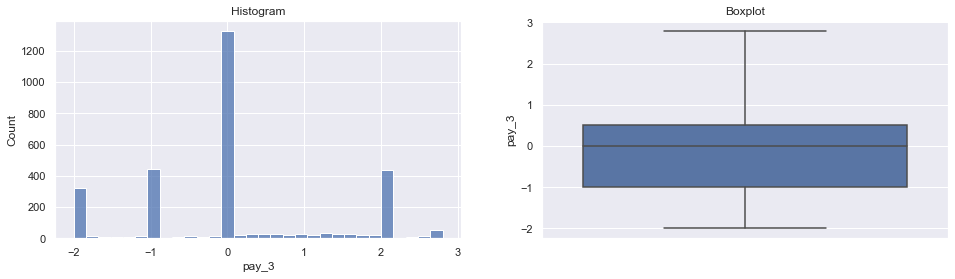

pay_4 - Before Capping


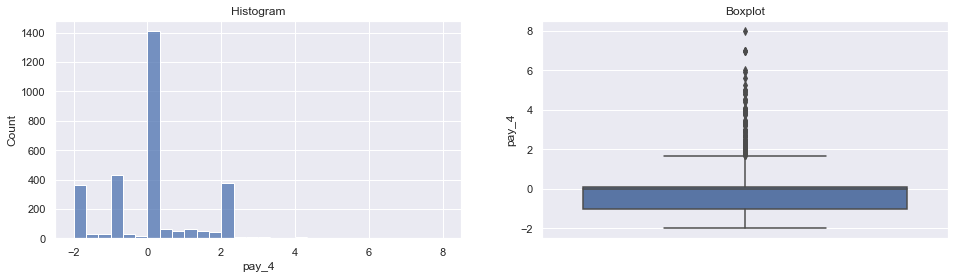

pay_4 - After Capping


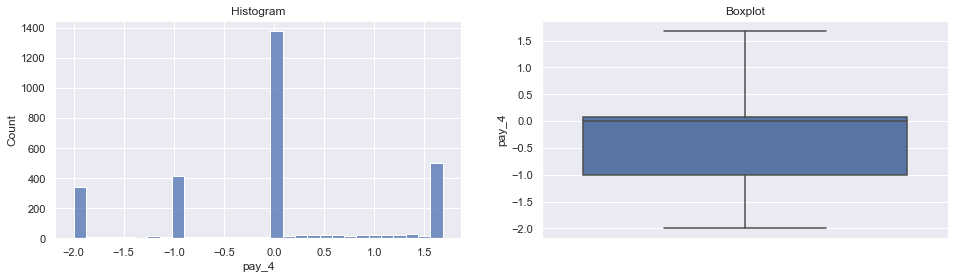

pay_5 - Before Capping


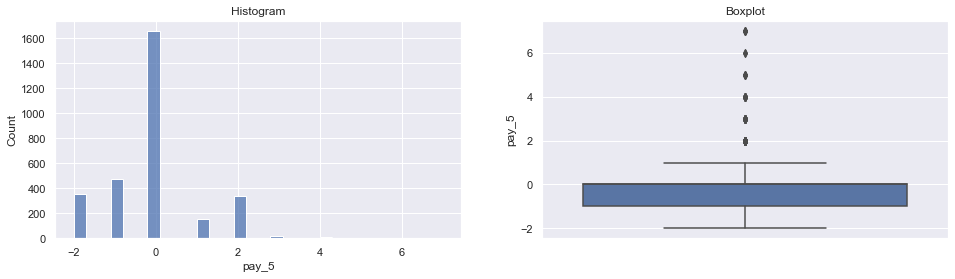

pay_5 - After Capping


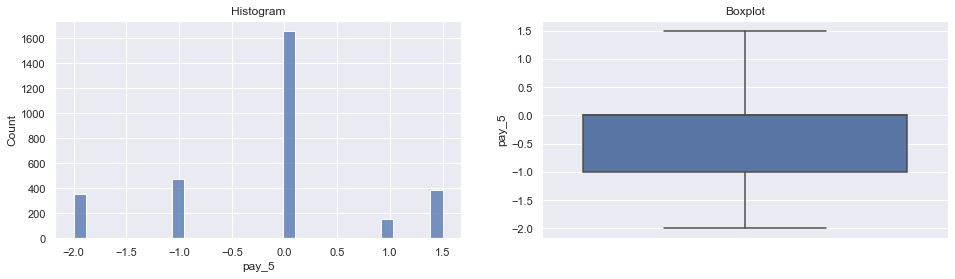

pay_6 - Before Capping


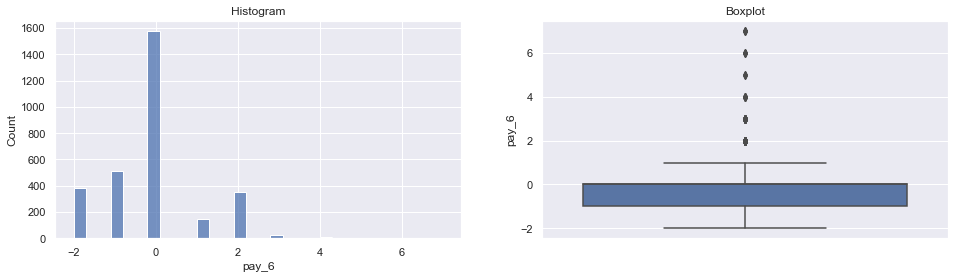

pay_6 - After Capping


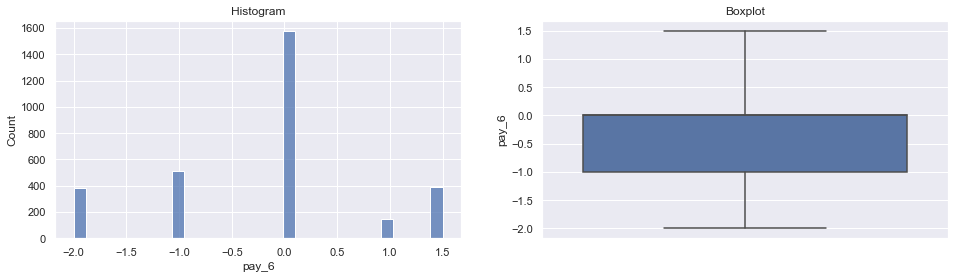

In [167]:
# Mari kita lihat perbedaan sesudah dan sebelum handling outliers
cols = ['limit_balance', 'education_level', 'age', 'pay_0','pay_2',
                        'pay_3','pay_4','pay_5','pay_6']
for i in cols:
    print(f'{i} - Before Capping')
    diagnostic_plots(X_train, i)
    print(f'{i} - After Capping')
    diagnostic_plots(X_train_cap, i)


Jika kita lihat grafik boxplot outliers terlihat ada perubahan nilai data Y karena outliers sudah dicapping

## Split Between Numerical columns and Categorical columns

In [168]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train_cap.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_cap.select_dtypes(include=['object']).columns.tolist()

# Combines three categoy into one
final_features = num_columns + cat_columns

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Categorical Columns :  []


Tidak terdapat Categorical Columns karena pada dasarnya sudah dataset sudah berbentuk categorical numerik.

In [169]:
# Split Train-set and Test-set based on Column Types

X_train_num = X_train_cap[num_columns]
X_test_num = X_test[num_columns]

In [170]:
def check_dist(data) :
    dist = data.skew(numeric_only=True)
    normal_dist = []
    skew_dist = []

    for i in range(len(dist)):
        if dist.values[i] < -0.5:
            skew_dist.append(dist.index[i])
        elif dist.values[i] > 0.5:
            skew_dist.append(dist.index[i])
        else:
            normal_dist.append(dist.index[i])

    print('skew_dist :', skew_dist)
    print("=========="*15)
    # normal_dist
    print('normal_dist :',normal_dist)

In [171]:
check_dist(X_train_num)

skew_dist : ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
normal_dist : ['sex', 'education_level', 'marital_status', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


Dibuktikan di atas bahwa kolom yang sudah di capping sudah menjadi normal distribution, namun pada kolom limit_balance tetap menjadi skewed, maka scaling skew distribution akan diperlakukan MinMaxScaler, dan normal distribution diperlakukan StandardScaler.

In [172]:
# categorizing features
skewed_cols = [
    'limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 
    'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 
    'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 
    'pay_amt_5', 'pay_amt_6']
norm_cols = [
    'sex', 'education_level', 'marital_status', 
    'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'
    ]

In [173]:
# print out list of predictors
print('Normal Distribution Features:')
print(norm_cols)
print('=' * 50)
print('Skewed Distributin Features:')
print(skewed_cols)

Normal Distribution Features:
['sex', 'education_level', 'marital_status', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
Skewed Distributin Features:
['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']


Definisikan terpisah antara normal distribusi dengan skew distribusi.

## Create Pipeline Feature Scaling


In [174]:
# create pipeline for standardization
std_pipe = Pipeline([
    ('std_scaler', StandardScaler())
])

# create pipeline for min max scaling
min_max_pipe = Pipeline([
    ('min_max_scaler', MinMaxScaler())
])


Pendifinisian scaler StandardScaler dan MinMaxScaler.

## Create Column Transformer

In [175]:
# create column transformer object using standard scaler and min max scaler
ct_pipe = ColumnTransformer([
    ('norm', std_pipe, norm_cols),
    ('skew', min_max_pipe, skewed_cols)
])


Menggabungkan 2 sclaer dalam 1 pipeline menggunakan ColumnTransformer.

# 6 - Model Definition

**Algoritma**

Di projek ini Milestone 01 akan memakai berbagai macam algoritma antara lain:
1. Logistic Regression
2. Support Vector Machine (SVM)
3. Decision Tree
4. Random Forest
5. K-Nearest Neighbors (KNN)
6. Naive Bayes
7. XGBoost Classifier

## Logistic Regression

In [176]:
## Logistic Regression

# Initial Model with pipe
LR = LogisticRegression(random_state=random_state)

# Model with pipeline
pipe_lr = Pipeline([
    ('preprocessing', ct_pipe),
    ('LR', LR)
])

# Hyper parameter
param_LR = {    
    'LR__penalty' : ['l1', 'l2'],
    'LR__C' : np.logspace(-4, 4, 20),
    'LR__solver' : ['liblinear', 'sag', 'saga'],
    'LR__max_iter' : [100, 1000]
    }

pipe_lr

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('norm',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['sex', 'education_level',
                                                   'marital_status', 'pay_0',
                                                   'pay_2', 'pay_3', 'pay_4',
                                                   'pay_5', 'pay_6']),
                                                 ('skew',
                                                  Pipeline(steps=[('min_max_scaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   '

### Support Vector Machine (SVM)

In [177]:
# Initial Model with pipe
SVM = SVC(random_state=random_state)

# Model with pipeline
pipe_svm = Pipeline([
    ('preprocessing', ct_pipe),
    ('SVM', SVM)
])

# Hyperparameter Tuning 
params_SVM = {    
    'SVM__C': [0.1, 1, 10],
    'SVM__gamma': [1, 0.1],
    'SVM__kernel': ['rbf']
    }

pipe_svm

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('norm',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['sex', 'education_level',
                                                   'marital_status', 'pay_0',
                                                   'pay_2', 'pay_3', 'pay_4',
                                                   'pay_5', 'pay_6']),
                                                 ('skew',
                                                  Pipeline(steps=[('min_max_scaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   '

### Decision Tree

In [178]:
# Initial Model with pipe
DT = DecisionTreeClassifier(random_state=random_state)

# Model with pipeline
pipe_dt = Pipeline([
    ('preprocessing', ct_pipe),
    ('DT', DT)
])


# Hyperparameter Tuning
params_DT = {
    'DT__criterion': ['gini', 'entropy'],
    'DT__max_depth': [None, 8, 16, 32],
    'DT__min_samples_split': [2, 4, 8, 16, 32, 64]
}

pipe_dt

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('norm',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['sex', 'education_level',
                                                   'marital_status', 'pay_0',
                                                   'pay_2', 'pay_3', 'pay_4',
                                                   'pay_5', 'pay_6']),
                                                 ('skew',
                                                  Pipeline(steps=[('min_max_scaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   '

### Random Forest

In [179]:
# Initial Model with pipe
RF = RandomForestClassifier(random_state=random_state)

# Model with pipeline
pipe_rf = Pipeline([
    ('preprocessing', ct_pipe),
    ('RF', RF)
])
pipe_rf

# Hyperparameter Tuning
params_RF = {
    'RF__criterion': ['gini', 'entropy'],
    'RF__min_samples_split': [2, 4, 8, 16, 32, 64],
    'RF__max_features': ['auto', 'sqrt', 'log2']
}

pipe_rf

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('norm',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['sex', 'education_level',
                                                   'marital_status', 'pay_0',
                                                   'pay_2', 'pay_3', 'pay_4',
                                                   'pay_5', 'pay_6']),
                                                 ('skew',
                                                  Pipeline(steps=[('min_max_scaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   '

### K-Nearest Neighbors (KNN)

In [180]:
# Initial Model with pipe
KNN = KNeighborsClassifier()

# Model with pipeline
pipe_knn = Pipeline([
    ('preprocessing', ct_pipe),
    ('KNN', KNN)
])

# Hyperparameter Tuning
params_KNN = {
    'KNN__n_neighbors' : range(1, 21, 2),
    'KNN__weights' : ['uniform', 'distance'],
    'KNN__metric' : ['euclidean', 'manhattan', 'minkowski']
}

pipe_knn

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('norm',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['sex', 'education_level',
                                                   'marital_status', 'pay_0',
                                                   'pay_2', 'pay_3', 'pay_4',
                                                   'pay_5', 'pay_6']),
                                                 ('skew',
                                                  Pipeline(steps=[('min_max_scaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   '

### Naive Bayes

In [181]:
# Initial Model with pipe
NB = GaussianNB()

# Model with pipeline
pipe_nb = Pipeline([
    ('preprocessing', ct_pipe),
    ('NB', NB)
])

#Hyperparamter Tuning
params_NB = {'NB__var_smoothing': np.logspace(0,-9, num=100)}

pipe_nb

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('norm',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['sex', 'education_level',
                                                   'marital_status', 'pay_0',
                                                   'pay_2', 'pay_3', 'pay_4',
                                                   'pay_5', 'pay_6']),
                                                 ('skew',
                                                  Pipeline(steps=[('min_max_scaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   '

## XGBoost Classifier

In [182]:
# Initial Model with pipe
XGB = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1, random_state=random_state)

# Model with pipeline
pipe_xgb = Pipeline([
    ('preprocessing', ct_pipe),
    ('XGB', XGB)
])

# Hyperparameter Tuning
params_xgb = {
    'XGB__max_depth': range (2, 10, 1),
    'XGB__n_estimators': range(60, 220, 40),
    'XGB__learning_rate': [0.1, 0.01, 0.05] 
    }

pipe_xgb

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('norm',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['sex', 'education_level',
                                                   'marital_status', 'pay_0',
                                                   'pay_2', 'pay_3', 'pay_4',
                                                   'pay_5', 'pay_6']),
                                                 ('skew',
                                                  Pipeline(steps=[('min_max_scaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   '

# 7 - MODEL TRAINING

Pemodelan training dari ke 7 Algoritma yang akan difit semua

## Training Cross Validation

In [183]:

# persiapkan model algoritma ke dalam sebuah list
models = [pipe_lr, pipe_svm, pipe_dt, pipe_rf, pipe_knn, pipe_nb, pipe_xgb]

# Membuat list kosong untuk mengisi hasilnya
names = []
results = []
mean_score = []
stdev_score = []

# Cross-validate masing-masing model
for name, model in models:
    model.fit(X_train_num,y_train)
    scores = cross_val_score(model, X_train_num, y_train, scoring='recall_weighted', cv=5, n_jobs=-1)

    names.append(name)
    results.append(scores)
    mean_score.append(round(np.mean(scores),4))
    stdev_score.append(round(np.std(scores),4))

cv_result = pd.DataFrame({'models':['LR', 'SVM', 'DT', 'RF', 'KNN', 'NB', 'XGB'], 'mean_score':mean_score, 'stdev_score':stdev_score})
# Training setiap model default
for model in models:
    print(model.fit(X_train_num,y_train))
    

# Predict setiap model
y_pred_train_lr = pipe_lr.predict(X_train_num)
y_pred_test_lr = pipe_lr.predict(X_test_num)
y_pred_train_svm = pipe_svm.predict(X_train_num)
y_pred_test_svm = pipe_svm.predict(X_test_num)
y_pred_train_dt = pipe_dt.predict(X_train_num)
y_pred_test_dt = pipe_dt.predict(X_test_num)
y_pred_train_rf = pipe_rf.predict(X_train_num)
y_pred_test_rf = pipe_rf.predict(X_test_num)
y_pred_train_knn = pipe_knn.predict(X_train_num)
y_pred_test_knn = pipe_knn.predict(X_test_num)
y_pred_train_nb = pipe_nb.predict(X_train_num)
y_pred_test_nb = pipe_nb.predict(X_test_num)
y_pred_train_xgb = pipe_xgb.predict(X_train_num)
y_pred_test_xgb = pipe_xgb.predict(X_test_num)


[19:46:25] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:46:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('norm',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['sex', 'education_level',
                                                   'm

## Training Grid Search

### Logistic Regression

In [184]:
# Hyperparameter tuning Logistic Regression
grid_lr = GridSearchCV(
    pipe_lr, param_LR, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1
).fit(X_train_num, y_train)

best_params_lr = grid_lr.best_params_
best_pipe_lr = grid_lr.best_estimator_
df_result_lr = pd.DataFrame.from_dict(grid_lr.cv_results_, orient='columns')

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [185]:
# Menampilkan parameter terbaik algoritma Logistic Regression
best_params_lr

{'LR__C': 29.763514416313132,
 'LR__max_iter': 100,
 'LR__penalty': 'l2',
 'LR__solver': 'liblinear'}

### Support Vector Machine

In [186]:
# Hyperparameter tuning Support Vector Machine
grid_svm = GridSearchCV(
    pipe_svm, params_SVM, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1
).fit(X_train_num, y_train)

best_params_svm = grid_svm.best_params_
best_pipe_svm = grid_svm.best_estimator_
df_result_svm = pd.DataFrame.from_dict(grid_svm.cv_results_, orient='columns')

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [187]:
# Menampilkan parameter terbaik algoritma Support Vector Machine
best_params_svm

{'SVM__C': 10, 'SVM__gamma': 1, 'SVM__kernel': 'rbf'}

### Decision Tree

In [188]:
# Hyperparameter tuning Decision Tree
grid_dt = GridSearchCV(
    pipe_dt, params_DT, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1
).fit(X_train_num, y_train)

best_params_dt = grid_dt.best_params_
best_pipe_dt = grid_dt.best_estimator_
df_result_dt = pd.DataFrame.from_dict(grid_dt.cv_results_, orient='columns')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [189]:
# Menampilkan parameter terbaik algoritma Decision Tree
best_params_dt

{'DT__criterion': 'entropy', 'DT__max_depth': 8, 'DT__min_samples_split': 4}

### Random Forest

In [190]:
# Hyperparameter tuning Random Forest
grid_rf = GridSearchCV(
    pipe_rf, params_RF, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1
).fit(X_train_num, y_train)

best_params_rf = grid_rf.best_params_
best_pipe_rf = grid_rf.best_estimator_
df_result_rf = pd.DataFrame.from_dict(grid_rf.cv_results_, orient='columns')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [191]:
# Menampilkan parameter terbaik algoritma Random Forest
best_params_rf

{'RF__criterion': 'entropy',
 'RF__max_features': 'auto',
 'RF__min_samples_split': 4}

### K-Nearest Neighbor

In [192]:
# Hyperparameter tuning K-Nearest Neighbor
grid_knn = GridSearchCV(
    pipe_knn, params_KNN, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1
).fit(X_train_num, y_train)

best_params_knn = grid_knn.best_params_
best_pipe_knn = grid_knn.best_estimator_
df_result_knn = pd.DataFrame.from_dict(grid_knn.cv_results_, orient='columns')

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [193]:
# Menampilkan parameter terbaik algoritma K-Nearest Neighbor
best_params_knn

{'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7, 'KNN__weights': 'distance'}

### Naive Bayes

In [194]:
# Hyperparameter tuning Naive Bayes
grid_nb = GridSearchCV(
    pipe_nb, params_NB, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1
).fit(X_train_num, y_train)

best_params_nb = grid_nb.best_params_
best_pipe_nb = grid_nb.best_estimator_
df_result_nb = pd.DataFrame.from_dict(grid_nb.cv_results_, orient='columns')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [195]:
# Menampilkan parameter terbaik algoritma Naive Bayes
best_params_nb

{'NB__var_smoothing': 0.02310129700083159}

### XGBoost

In [196]:
# Hyperparameter tuning Ridge Classifier
grid_xgb = GridSearchCV(
    estimator=pipe_xgb, param_grid=params_xgb, cv=5, scoring='roc_auc', n_jobs=5, verbose=True
).fit(X_train_num, y_train)

best_params_xgb = grid_xgb.best_params_
best_pipe_xgb = grid_xgb.best_estimator_
df_result_xgb = pd.DataFrame.from_dict(grid_xgb.cv_results_, orient='columns')

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[19:58:14] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:58:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [197]:
# Menampilkan parameter terbaik algoritma Ridge Classifier
best_params_xgb

{'XGB__learning_rate': 0.1, 'XGB__max_depth': 7, 'XGB__n_estimators': 180}

# 8 - MODEL EVALUATION

## Evaluasi Model Cross Validation

In [198]:
# Showing the result of Cross Validation
cv_result.sort_values(by='mean_score', ascending=False)

,models,mean_score,stdev_score
6,XGB,0.8707,0.0109
3,RF,0.8694,0.0113
2,DT,0.7818,0.0138
4,KNN,0.7102,0.0085
1,SVM,0.6157,0.0126
5,NB,0.5845,0.0116
0,LR,0.5842,0.0103


Berdasarkan hasil Cross Validation di atas model yang menunjukkan hasil terbaik dari Recall Weighted, dipilih 3 teratas untuk model yang akan dievaluasi dan dipakai untuk model inference yaitu Random Forest, XGBoost Classifier, dan Decission Tree.

## Decision Tree

In [199]:
# prepare target names for classification report
target_names = ['Not Default', 'Default']

### Evaluasi model sebelum melakukan Grid SearchCV

In [200]:
print('ROC-AUC train : ',roc_auc_score(y_train,y_pred_train_dt))
print('ROC-AUC test : ',roc_auc_score(y_test,y_pred_test_dt))

ROC-AUC train :  1.0
ROC-AUC test :  0.8133461510556482


In [201]:
selisih = roc_auc_score(y_test,y_pred_test_dt) - roc_auc_score(y_train,y_pred_train_dt)
selisih

-0.18665384894435177

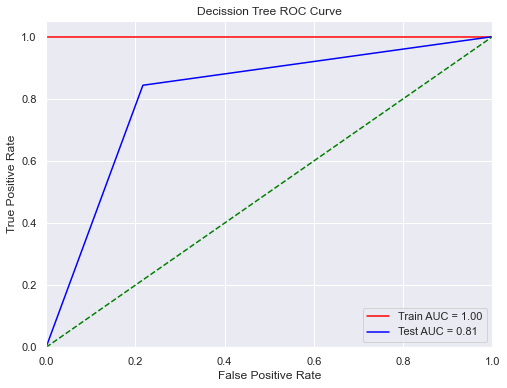

In [202]:
# plot roc curve for train set
fpr_train_dt, tpr_train_dt, _ = roc_curve(y_train, y_pred_train_dt)
# calculate auc score for train set
roc_auc_train_dt = auc(fpr_train_dt, tpr_train_dt)

# plot roc curve for test set
fpr_test_dt, tpr_test_dt, _ = roc_curve(y_test, y_pred_test_dt)
# calculate auc score for test set
roc_auc_test_dt = auc(fpr_test_dt, tpr_test_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train_dt, tpr_train_dt, color='red', label=f'Train AUC = {roc_auc_train_dt:.2f}')
plt.plot(fpr_test_dt, tpr_test_dt, color='blue', label=f'Test AUC = {roc_auc_test_dt:.2f}')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decission Tree ROC Curve')
plt.legend(loc="lower right")
plt.show()

Dari performa ROC-AUC cukup besar dan selish antara test - train memiliki perbedaan -0.19178689687795647 yang mana artinya Decision Tree sebelum dilakukan Cross Validation dan Grid Search cukup **over fitting**. 

In [203]:
#Performance Metrics
print('==================== Train Results (Decision Tree) ====================')
print(classification_report(y_train, y_pred_train_dt, target_names=target_names))

print('==================== Test Results (Decision Tree) ====================')
print(classification_report(y_test, y_pred_test_dt, target_names=target_names))


==================== Train Results (Decision Tree) ====================
              precision    recall  f1-score   support

 Not Default       1.00      1.00      1.00      1481
     Default       1.00      1.00      1.00      1535

    accuracy                           1.00      3016
   macro avg       1.00      1.00      1.00      3016
weighted avg       1.00      1.00      1.00      3016

==================== Test Results (Decision Tree) ====================
              precision    recall  f1-score   support

 Not Default       0.84      0.78      0.81       770
     Default       0.78      0.84      0.81       716

    accuracy                           0.81      1486
   macro avg       0.81      0.81      0.81      1486
weighted avg       0.81      0.81      0.81      1486



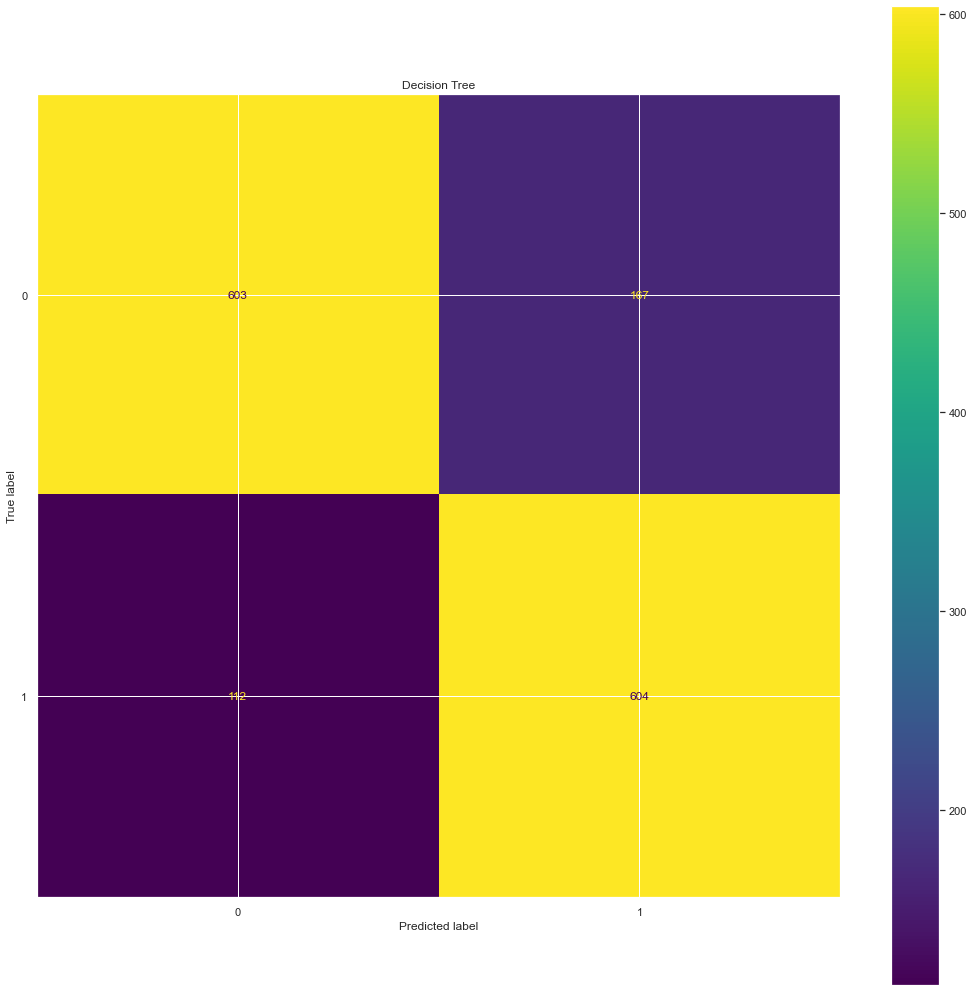

In [204]:
cm = confusion_matrix(y_test, y_pred_test_dt, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()
plt.title("Decision Tree")
plt.show()

Hasil Classfication report pada model Decision Tree sebelum hyperparameter tuning:
- Pada hasil classification untuk model Decision Tree recall untuk data train mesin DT cukup baik mempelajarinya atau sempurna yaitu 1.0.
- Pada nilai test mendapatkan nilai recall Not Default 0.78 dan Default 0.84, begitu sebaliknya untuk nilai precision Not Default 0.84 dan Default 0.78.
- Untuk f1 score mendapatkan nilai yang imbang yaitu 0.81 masing-masing, karena dataset sudah dilakukan rebalancing menggunakan smote. 
- Sehingga pada akhirnya mendapatkan accuracy score 0.81 untuk nilai test model Decision Tree sebelum dilakukan hyperparameter tuning.
- dari hasil accuracy score dilihat pada confusion matrix FN dan FP yang mana nilai eror terbut imbang antara 167 dan 112, dalam bidang industri pasti ingin model Machine Learning memiliki hasil prediksi sempurna tidak ada eror agar tidak ada bias pada hasil yang didapat, maka perlu dilakukan penambahan data dan klasifikasi yang seimbang pada binary classificationnya.
- Namun pada nilai Train dan Test masih dibilang over fitting, yang memungkinkan hasil dari prediksi masih kekurangan data untuk memprediksi test lebih lanjut.

### Evaluasi Model Grid Search

In [205]:
# predict train set using the final model
y_pred_train_final_dt = best_pipe_dt.predict(X_train_num)

# predict test set using the final model
y_pred_test_final_dt = best_pipe_dt.predict(X_test_num)

In [206]:
# Performance Metrics ROC-AUC after grid
print('==================== Train Results (Decision Tree) ====================')
print(roc_auc_score(y_train, y_pred_train_final_dt))

print('==================== Test Results (Decision Tree) ====================')
print(roc_auc_score(y_test, y_pred_test_final_dt))

==================== Train Results (Decision Tree) ====================
0.8453377966731697
==================== Test Results (Decision Tree) ====================
0.8121961837045636


In [207]:
selisih = roc_auc_score(y_test,y_pred_test_final_dt) - roc_auc_score(y_train,y_pred_train_final_dt)
selisih

-0.03314161296860607

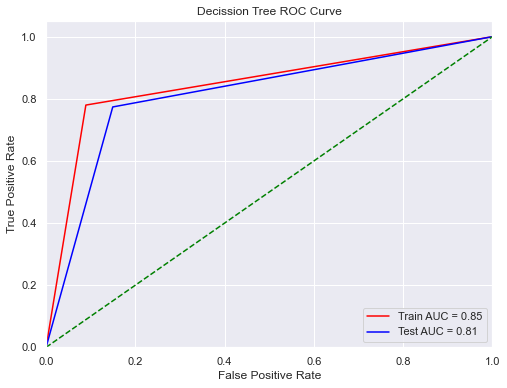

In [208]:
# plot roc curve for train set
fpr_train_dt, tpr_train_dt, _ = roc_curve(y_train, y_pred_train_final_dt)
# calculate auc score for train set
roc_auc_train_dt = auc(fpr_train_dt, tpr_train_dt)

# plot roc curve for test set
fpr_test_dt, tpr_test_dt, _ = roc_curve(y_test, y_pred_test_final_dt)
# calculate auc score for test set
roc_auc_test_dt = auc(fpr_test_dt, tpr_test_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train_dt, tpr_train_dt, color='red', label=f'Train AUC = {roc_auc_train_dt:.2f}')
plt.plot(fpr_test_dt, tpr_test_dt, color='blue', label=f'Test AUC = {roc_auc_test_dt:.2f}')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decission Tree ROC Curve')
plt.legend(loc="lower right")
plt.show()

Dari performa ROC-AUC cukup besar dan selish antara test - train memiliki perbedaan 0.3314161296860607 yang mana artinya Decision Tree setelah dilakukan Cross Validation dan Grid Search cukup **good fitting**. 

In [209]:
# Performance Metrics Classification Report after grid
print('==================== Train Results (Decision Tree) ====================')
print(classification_report(y_train, y_pred_train_final_dt, target_names=target_names))

print('==================== Test Results (Decision Tree) ====================')
print(classification_report(y_test, y_pred_test_final_dt, target_names=target_names))

==================== Train Results (Decision Tree) ====================
              precision    recall  f1-score   support

 Not Default       0.80      0.91      0.85      1481
     Default       0.90      0.78      0.84      1535

    accuracy                           0.84      3016
   macro avg       0.85      0.85      0.84      3016
weighted avg       0.85      0.84      0.84      3016

==================== Test Results (Decision Tree) ====================
              precision    recall  f1-score   support

 Not Default       0.80      0.85      0.83       770
     Default       0.83      0.77      0.80       716

    accuracy                           0.81      1486
   macro avg       0.81      0.81      0.81      1486
weighted avg       0.81      0.81      0.81      1486



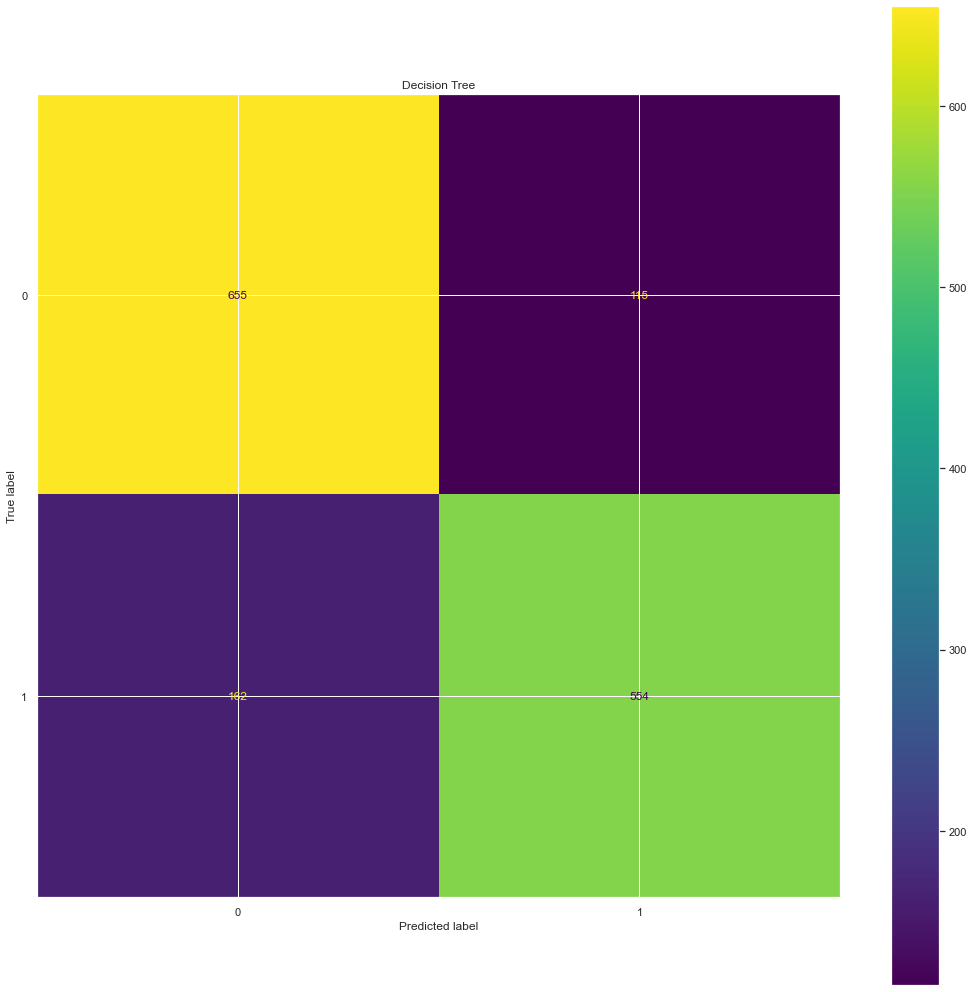

In [210]:
cm = confusion_matrix(y_test, y_pred_test_final_dt, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()
plt.title("Decision Tree")
plt.show()

Hasil Classfication report pada model Decision Tree setelah hyperparameter tuning:

- Pada nilai test mendapatkan nilai recall Not Default 0.91 dan Default 0.78, begitu sebaliknya untuk nilai precision Not Default 0.80 dan Default 0.90
- Untuk f1 score mendapatkan nilai yang imbang yaitu 0.85 untuk Not Default dan 0.84 untuk Default, karena dataset sudah dilakukan rebalancing menggunakan smote. 
- Sehingga pada akhirnya mendapatkan accuracy score 0.84 nilai train dan 0.81 nilai test model Decision Tree setelah dilakukan hyperparameter tuning sudah memberi hasil yang **good fitting**.
- dari hasil accuracy score dilihat pada confusion matrix FN dan FP yang mana nilai eror tersebut imbang antara 115 dan 162, dalam bidang industri pasti ingin model Machine Learning memiliki hasil prediksi sempurna tidak ada eror agar tidak ada bias pada hasil yang didapat, maka perlu dilakukan penambahan data dan klasifikasi yang seimbang pada binary classificationnya.
- Namun pada nilai Train dan Test masih dibilang goodfiting fitting, namun prediksi masih memiliki banyak eroor yang memungkinkan hasil dari prediksi masih kekurangan data untuk memprediksi test lebih lanjut.

## Random Forest

### Evaluasi model sebelum melakukan Grid SearchCV

In [211]:
print('ROC-AUC train : ',roc_auc_score(y_train,y_pred_train_rf))
print('ROC-AUC test : ',roc_auc_score(y_test,y_pred_test_rf))

ROC-AUC train :  1.0
ROC-AUC test :  0.8859011100631211


In [212]:
selisih = roc_auc_score(y_test,y_pred_test_rf) - roc_auc_score(y_train,y_pred_train_rf)
selisih

-0.11409888993687889

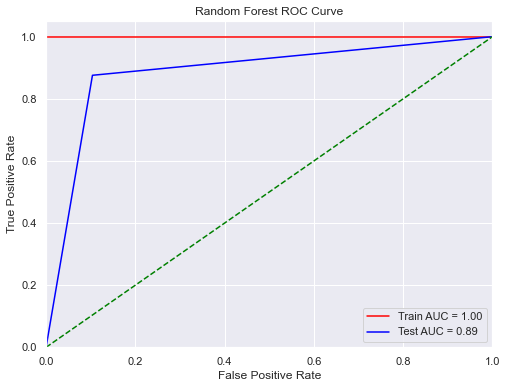

In [213]:
# plot roc curve for train set
fpr_train_rf, tpr_train_rf, _ = roc_curve(y_train, y_pred_train_rf)
# calculate auc score for train set
roc_auc_train_rf = auc(fpr_train_rf, tpr_train_rf)

# plot roc curve for test set
fpr_test_rf, tpr_test_rf, _ = roc_curve(y_test, y_pred_test_rf)
# calculate auc score for test set
roc_auc_test_rf = auc(fpr_test_rf, tpr_test_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train_rf, tpr_train_rf, color='red', label=f'Train AUC = {roc_auc_train_rf:.2f}')
plt.plot(fpr_test_rf, tpr_test_rf, color='blue', label=f'Test AUC = {roc_auc_test_rf:.2f}')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()

Dari performa ROC-AUC cukup besar dan selish antara test - train memiliki perbedaan -0.11409888993687889 yang mana artinya Random Forest sebelum dilakukan Cross Validation dan Grid Search cukup **over fitting**. 

In [214]:
#Performance Metrics
print('==================== Train Results (Random Forest) ====================')
print(classification_report(y_train, y_pred_train_rf, target_names=target_names))

print('==================== Test Results (Random Forest) ====================')
print(classification_report(y_test, y_pred_test_rf, target_names=target_names))


==================== Train Results (Random Forest) ====================
              precision    recall  f1-score   support

 Not Default       1.00      1.00      1.00      1481
     Default       1.00      1.00      1.00      1535

    accuracy                           1.00      3016
   macro avg       1.00      1.00      1.00      3016
weighted avg       1.00      1.00      1.00      3016

==================== Test Results (Random Forest) ====================
              precision    recall  f1-score   support

 Not Default       0.89      0.90      0.89       770
     Default       0.89      0.88      0.88       716

    accuracy                           0.89      1486
   macro avg       0.89      0.89      0.89      1486
weighted avg       0.89      0.89      0.89      1486



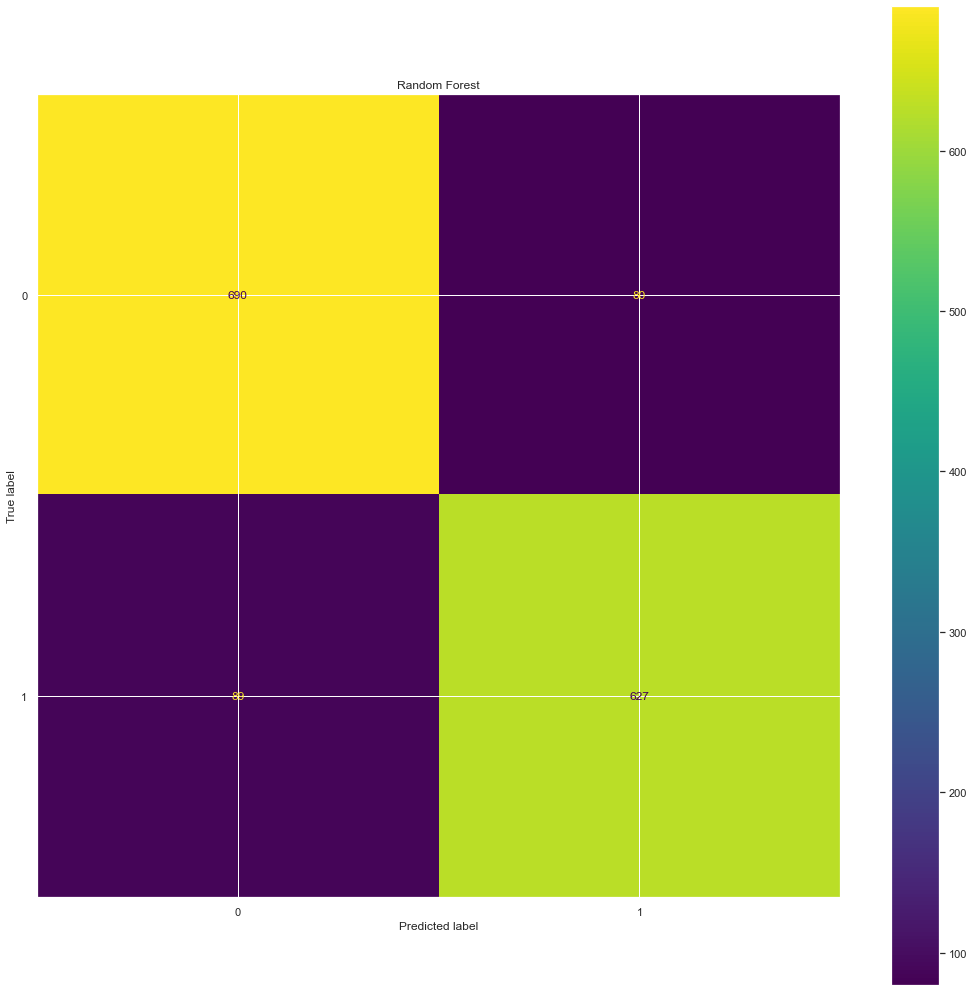

In [215]:
cm = confusion_matrix(y_test, y_pred_test_rf, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()
plt.title("Random Forest")
plt.show()

Hasil Classfication report pada model Random Forest sebelum hyperparameter tuning:
- Pada hasil classification untuk model Random Forest recall untuk data train mesin RF cukup baik mempelajarinya atau sempurna yaitu 1.0.
- Pada nilai test mendapatkan nilai recall Not Default 0.90 dan Default 0.88, untuk nilai precision Not Default 0.89 dan Default 0.89 pada nilai recall untuk model random forest dengan hyperparameter default cukup baik memprediksinya.
- Untuk f1 score mendapatkan nilai yang imbang yaitu Not Default 0.88 dan Default 0.89 masing-masing, karena dataset sudah dilakukan rebalancing menggunakan smote. 
- Sehingga pada akhirnya dari hasil yang sudah dihitung oleh classification report mendapatkan accuracy score 0.89 untuk nilai test model Random Forest sebelum dilakukan hyperparameter tuning.
- dari hasil accuracy score dilihat pada confusion matrix FN dan FP yang mana nilai eror terbut imbang antara 89 dan 89, dalam bidang industri pasti ingin model Machine Learning memiliki hasil prediksi sempurna tidak ada eror agar tidak ada bias pada hasil yang didapat, maka perlu dilakukan penambahan data dan klasifikasi yang seimbang pada binary classificationnya.
- Namun pada nilai Train dan Test masih dibilang over fitting, yang memungkinkan hasil dari prediksi masih kekurangan data untuk memprediksi test lebih lanjut.

### Evaluasi Model Grid Search

In [216]:
# predict train set using the final model
y_pred_train_final_rf = best_pipe_rf.predict(X_train_num)

# predict test set using the final model
y_pred_test_final_rf = best_pipe_rf.predict(X_test_num)

In [217]:
# Performance Metrics ROC-AUC after grid
print('==================== Train Results (Random Forest) ====================')
print(roc_auc_score(y_train, y_pred_train_final_rf))

print('==================== Test Results (Random Forest) ====================')
print(roc_auc_score(y_test, y_pred_test_final_rf))

==================== Train Results (Random Forest) ====================
0.9989990476546571
==================== Test Results (Random Forest) ====================
0.8859011100631211


In [218]:
selisih = roc_auc_score(y_test,y_pred_test_final_rf) - roc_auc_score(y_train,y_pred_train_final_rf)
selisih

-0.11309793759153597

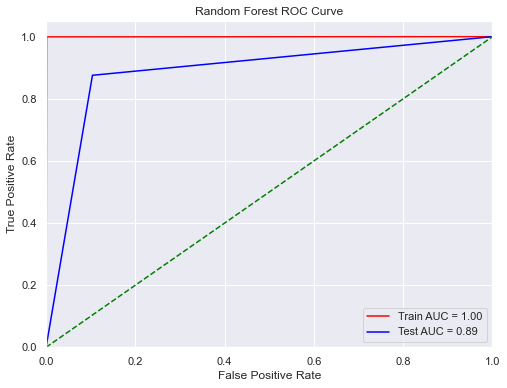

In [219]:
# plot roc curve for train set
fpr_train_rf, tpr_train_rf, _ = roc_curve(y_train, y_pred_train_final_rf)
# calculate auc score for train set
roc_auc_train_rf = auc(fpr_train_rf, tpr_train_rf)

# plot roc curve for test set
fpr_test_rf, tpr_test_rf, _ = roc_curve(y_test, y_pred_test_final_rf)
# calculate auc score for test set
roc_auc_test_rf = auc(fpr_test_rf, tpr_test_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train_rf, tpr_train_rf, color='red', label=f'Train AUC = {roc_auc_train_rf:.2f}')
plt.plot(fpr_test_rf, tpr_test_rf, color='blue', label=f'Test AUC = {roc_auc_test_rf:.2f}')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()

Dari performa ROC-AUC cukup besar dan selish antara test - train memiliki perbedaan -0.11309793759153597 yang mana tidak jauh berbeda artinya Random Forest setelah dilakukan Cross Validation dan Grid Search cukup **over fitting**. 

In [220]:
# Performance Metrics Classification Report after grid
print('==================== Train Results (Random Forest) ====================')
print(classification_report(y_train, y_pred_train_final_rf, target_names=target_names))

print('==================== Test Results (Random Forest) ====================')
print(classification_report(y_test, y_pred_test_final_rf, target_names=target_names))

==================== Train Results (Random Forest) ====================
              precision    recall  f1-score   support

 Not Default       1.00      1.00      1.00      1481
     Default       1.00      1.00      1.00      1535

    accuracy                           1.00      3016
   macro avg       1.00      1.00      1.00      3016
weighted avg       1.00      1.00      1.00      3016

==================== Test Results (Random Forest) ====================
              precision    recall  f1-score   support

 Not Default       0.89      0.90      0.89       770
     Default       0.89      0.88      0.88       716

    accuracy                           0.89      1486
   macro avg       0.89      0.89      0.89      1486
weighted avg       0.89      0.89      0.89      1486



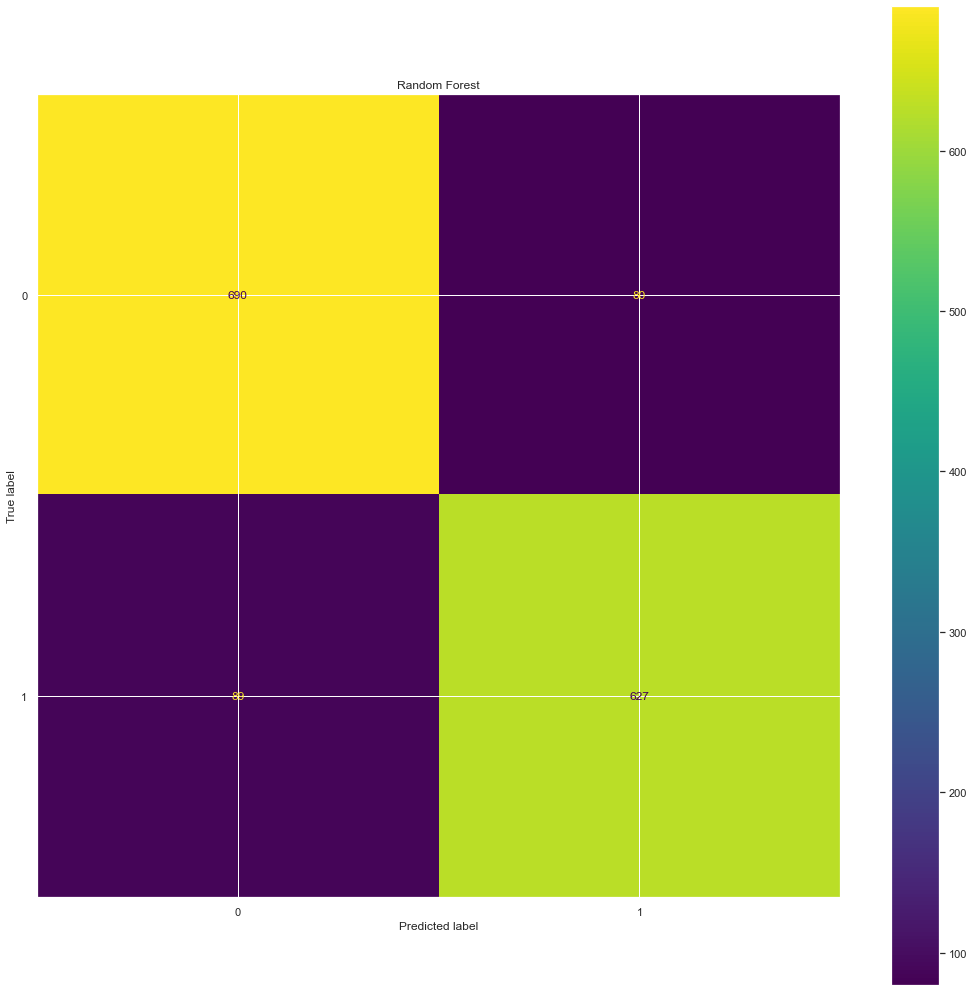

In [221]:
cm = confusion_matrix(y_test, y_pred_test_final_rf, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()
plt.title("Random Forest")
plt.show()

Hasil Classfication report pada model Random Forest setelah hyperparameter tuning:
- Pada hasil classification untuk model Random Forest recall untuk data train mesin RF cukup baik mempelajarinya atau sempurna yaitu 1.0.
- Pada nilai test mendapatkan nilai recall Not Default 0.90 dan Default 0.88, untuk nilai precision Not Default 0.89 dan Default 0.89 pada nilai recall untuk model random forest dengan hyperparameter default cukup baik memprediksinya.
- Untuk f1 score mendapatkan nilai yang imbang yaitu Not Default 0.88 dan Default 0.89 masing-masing, karena dataset sudah dilakukan rebalancing menggunakan smote. 
- Sehingga pada akhirnya dari hasil yang sudah dihitung oleh classification report mendapatkan accuracy score 0.89 untuk nilai test model Random Forest sebelum dilakukan hyperparameter tuning.
- dari hasil accuracy score dilihat pada confusion matrix FN dan FP yang mana nilai eror terbut imbang antara 89 dan 89, dalam bidang industri pasti ingin model Machine Learning memiliki hasil prediksi sempurna tidak ada eror agar tidak ada bias pada hasil yang didapat, maka perlu dilakukan penambahan data dan klasifikasi yang seimbang pada binary classificationnya.
- Namun pada nilai Train dan Test masih dibilang over fitting, yang memungkinkan hasil dari prediksi masih kekurangan data untuk memprediksi test lebih lanjut.
- Pada model Random Forest ini baik sebelum dan sesudah dilakukan hyperparameter tuning tidak memiliki perbedaan pada hasilnya.

## XGBoost Classifier

### Evaluasi model sebelum melakukan Grid SearchCV

In [222]:
print('ROC-AUC train : ',roc_auc_score(y_train,y_pred_train_xgb))
print('ROC-AUC test : ',roc_auc_score(y_test,y_pred_test_xgb))

ROC-AUC train :  0.9806511138921452
ROC-AUC test :  0.88425959515345


In [223]:
selisih = roc_auc_score(y_test,y_pred_test_xgb) - roc_auc_score(y_train,y_pred_train_xgb)
selisih

-0.09639151873869523

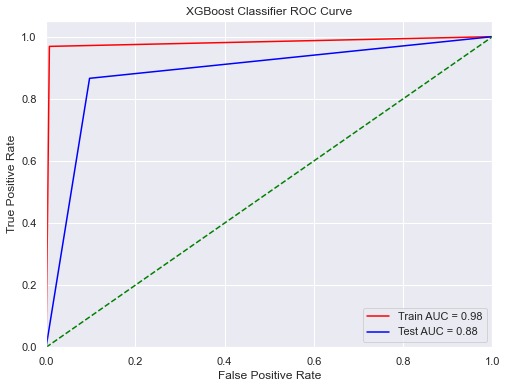

In [224]:
# plot roc curve for train set
fpr_train_xgb, tpr_train_xgb, _ = roc_curve(y_train, y_pred_train_xgb)
# calculate auc score for train set
roc_auc_train_xgb = auc(fpr_train_xgb, tpr_train_xgb)

# plot roc curve for test set
fpr_test_xgb, tpr_test_xgb, _ = roc_curve(y_test, y_pred_test_xgb)
# calculate auc score for test set
roc_auc_test_xgb = auc(fpr_test_xgb, tpr_test_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train_xgb, tpr_train_xgb, color='red', label=f'Train AUC = {roc_auc_train_xgb:.2f}')
plt.plot(fpr_test_xgb, tpr_test_xgb, color='blue', label=f'Test AUC = {roc_auc_test_xgb:.2f}')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()

Dari performa ROC-AUC cukup besar dan selish antara test - train memiliki perbedaan -0.09639151873869523 yang mana artinya XGBoost Classifier sebelum dilakukan Cross Validation dan Grid Search cukup **over fitting**. 

In [225]:
#Performance Metrics
print('==================== Train Results (XGBoost Classifier) ====================')
print(classification_report(y_train, y_pred_train_xgb, target_names=target_names))

print('==================== Test Results (XGBoost Classifier) ====================')
print(classification_report(y_test, y_pred_test_xgb, target_names=target_names))


==================== Train Results (XGBoost Classifier) ====================
              precision    recall  f1-score   support

 Not Default       0.97      0.99      0.98      1481
     Default       0.99      0.97      0.98      1535

    accuracy                           0.98      3016
   macro avg       0.98      0.98      0.98      3016
weighted avg       0.98      0.98      0.98      3016

==================== Test Results (XGBoost Classifier) ====================
              precision    recall  f1-score   support

 Not Default       0.88      0.90      0.89       770
     Default       0.89      0.87      0.88       716

    accuracy                           0.88      1486
   macro avg       0.89      0.88      0.88      1486
weighted avg       0.89      0.88      0.88      1486



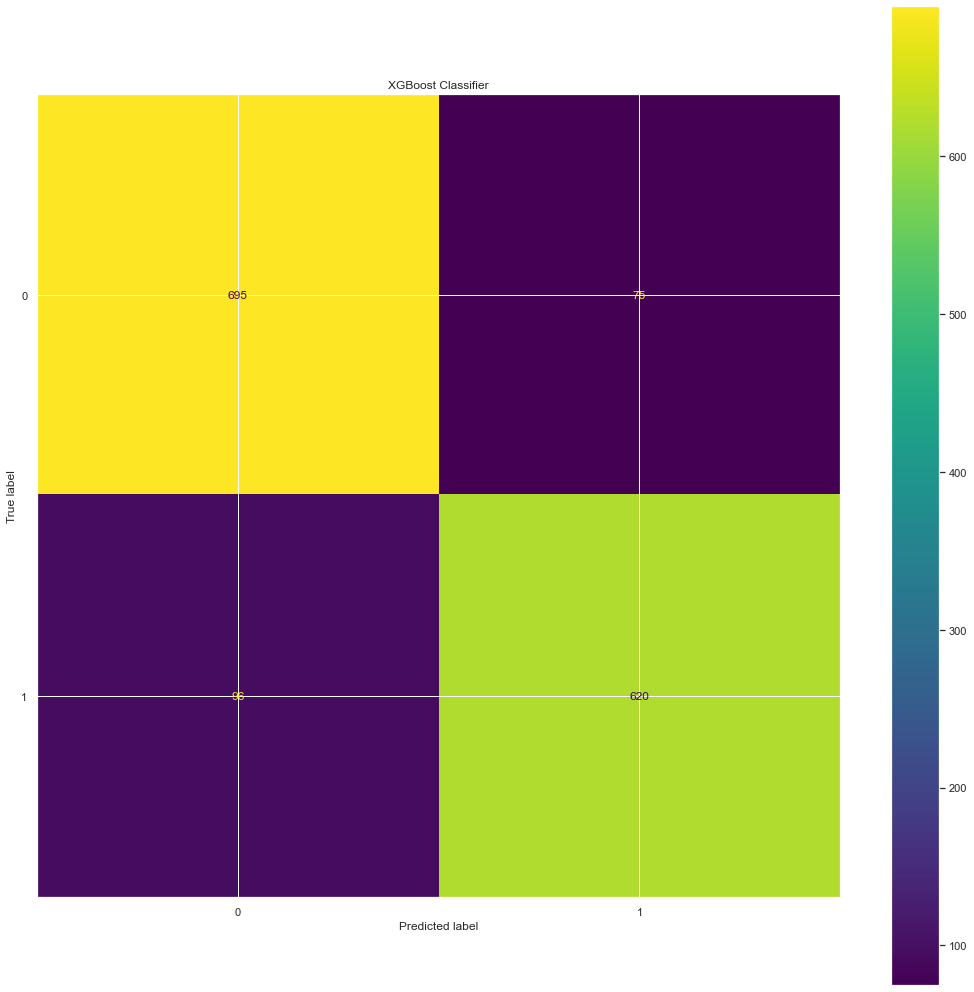

In [226]:
cm = confusion_matrix(y_test, y_pred_test_xgb, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()
plt.title("XGBoost Classifier")
plt.show()

Hasil ROC-AUC dan Classfication report pada model XGBoost Classifier sebelum hyperparameter tuning:

- Pada nilai test mendapatkan nilai recall Not Default 0.90 dan Default 0.87, untuk nilai precision Not Default 0.88 dan Default 0.89 pada nilai recall untuk model XGBoost Classifier dengan hyperparameter default cukup baik memprediksinya.
- Untuk f1 score data test mendapatkan nilai yang imbang yaitu Not Default 0.88 dan Default 0.89 masing-masing, karena dataset sudah dilakukan rebalancing menggunakan smote. 
- Sehingga pada akhirnya dari hasil yang sudah dihitung oleh classification report mendapatkan accuracy score 0.98 untuk train dan 0.88 untuk test untuk nilai test model XGBoost Classifier sebelum dilakukan hyperparameter tuning.
- dari hasil accuracy score dilihat pada confusion matrix FN dan FP yang mana nilai eror terbut imbang antara 75 dan 76 di model XGB ini eror yang didapatkan lebih sedikit daripada Decision Tree dan Random Forest, dalam bidang industri pasti ingin model Machine Learning memiliki hasil prediksi sempurna tidak ada eror agar tidak ada bias pada hasil yang didapat, maka perlu dilakukan penambahan data dan klasifikasi yang seimbang pada binary classificationnya.
- Namun pada nilai Train dan Test masih dibilang over fitting, yang memungkinkan hasil dari prediksi masih kekurangan data untuk memprediksi test lebih lanjut.

### Evaluasi Model Grid Search

In [227]:
# predict train set using the final model
y_pred_train_final_xgb = best_pipe_xgb.predict(X_train_num)

# predict test set using the final model
y_pred_test_final_xgb = best_pipe_xgb.predict(X_test_num)

In [228]:
# Performance Metrics ROC-AUC after grid
print('==================== Train Results (XGBoost Classifier) ====================')
print(roc_auc_score(y_train, y_pred_train_final_xgb))

print('==================== Test Results (XGBoost Classifier) ====================')
print(roc_auc_score(y_test, y_pred_test_final_xgb))

==================== Train Results (XGBoost Classifier) ====================
0.9983357050324743
==================== Test Results (XGBoost Classifier) ====================
0.8863055938474933


In [229]:
selisih = roc_auc_score(y_test,y_pred_test_final_xgb) - roc_auc_score(y_train,y_pred_train_final_xgb)
selisih

-0.11203011118498096

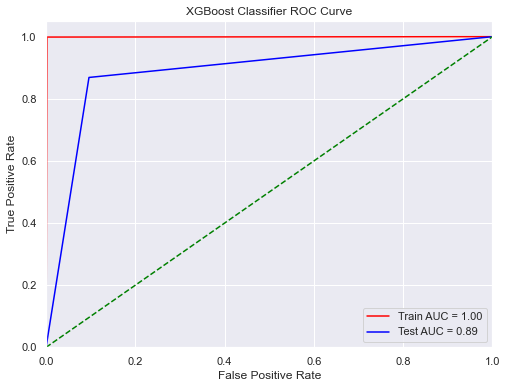

In [230]:
# plot roc curve for train set
fpr_train_xgb, tpr_train_xgb, _ = roc_curve(y_train, y_pred_train_final_xgb)
# calculate auc score for train set
roc_auc_train_xgb = auc(fpr_train_xgb, tpr_train_xgb)

# plot roc curve for test set
fpr_test_xgb, tpr_test_xgb, _ = roc_curve(y_test, y_pred_test_final_xgb)
# calculate auc score for test set
roc_auc_test_xgb = auc(fpr_test_xgb, tpr_test_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train_xgb, tpr_train_xgb, color='red', label=f'Train AUC = {roc_auc_train_xgb:.2f}')
plt.plot(fpr_test_xgb, tpr_test_xgb, color='blue', label=f'Test AUC = {roc_auc_test_xgb:.2f}')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [231]:
# Performance Metrics Classification Report after grid
print('==================== Train Results (XGBoost Classifier) ====================')
print(classification_report(y_train, y_pred_train_final_xgb, target_names=target_names))

print('==================== Test Results (XGBoost Classifier) ====================')
print(classification_report(y_test, y_pred_test_final_xgb, target_names=target_names))

==================== Train Results (XGBoost Classifier) ====================
              precision    recall  f1-score   support

 Not Default       1.00      1.00      1.00      1481
     Default       1.00      1.00      1.00      1535

    accuracy                           1.00      3016
   macro avg       1.00      1.00      1.00      3016
weighted avg       1.00      1.00      1.00      3016

==================== Test Results (XGBoost Classifier) ====================
              precision    recall  f1-score   support

 Not Default       0.88      0.90      0.89       770
     Default       0.89      0.87      0.88       716

    accuracy                           0.89      1486
   macro avg       0.89      0.89      0.89      1486
weighted avg       0.89      0.89      0.89      1486



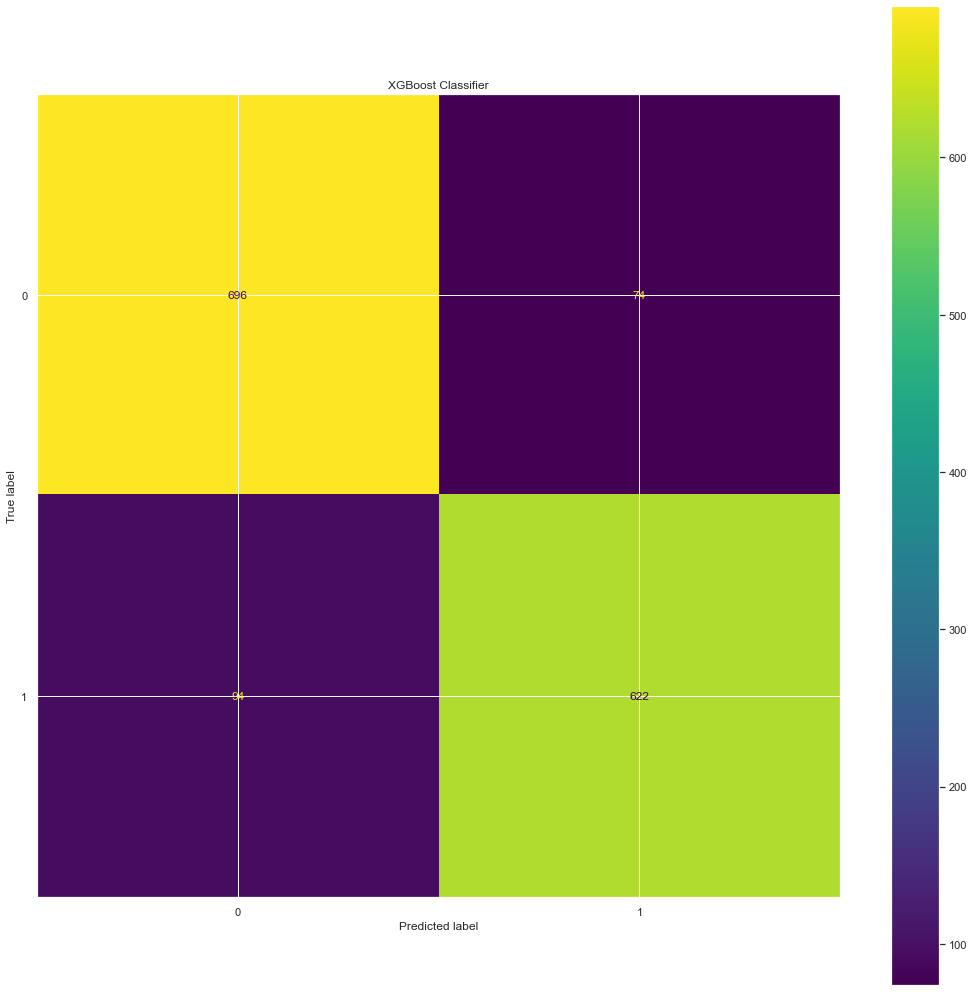

In [232]:
cm = confusion_matrix(y_test, y_pred_test_final_xgb, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()
plt.title("XGBoost Classifier")
plt.show()

Hasil ROC-AUC dan Classfication report pada model XGBoost Classifier setelah hyperparameter tuning:

- Pada classification report untuk data train model XGBoost Classification cukup baik mempelajarinya atau sempurna yaitu 1.0.
- Pada nilai test mendapatkan nilai recall masih sama dengan default hyperparameter Not Default 0.90 dan Default 0.87, untuk nilai precision Not Default 0.88 dan Default 0.89 pada nilai recall untuk model XGBoost Classifier dengan hyperparameter setelah tunning cukup baik memprediksinya.
- Untuk f1 score data test mendapatkan nilai yang imbang yaitu Not Default 0.88 dan Default 0.89 masing-masing, karena dataset sudah dilakukan rebalancing menggunakan smote. 
- Sehingga pada akhirnya dari hasil yang sudah dihitung oleh classification report mendapatkan accuracy score 1.0 untuk train dan mengalami kenaikan menjadi 0.89 untuk nilai test model XGBoost Classifier setelah dilakukan hyperparameter tuning.
- dari hasil accuracy score dilihat pada confusion matrix FN dan FP yang mana nilai eror terbut imbang antara 74 dan 94 di model XGB ini eror yang didapatkan lebih sedikit daripada Decision Tree dan Random Forest, dalam bidang industri pasti ingin model Machine Learning memiliki hasil prediksi sempurna tidak ada eror agar tidak ada bias pada hasil yang didapat, maka perlu dilakukan penambahan data dan klasifikasi yang seimbang pada binary classificationnya.
- Namun pada nilai Train dan Test masih dibilang over fitting, yang memungkinkan hasil dari prediksi masih kekurangan data untuk memprediksi test lebih lanjut.

## Choose top 1 model for inferencing

Dari data hasil ROC-AUC dan Classification di atas maka yang terbaik di model ini dipegang oleh XGBoost Classifier, yang merupakan model algoritma termuda, yang mana berdasarkan parameter accuracy score yang didapat XGBoost Classifier yaitu memprediski test sebesar 0.89. Namun perlu dikaji lebih lanjut pada distribusi kolom yang masih kurang serta ketidak seimbangan data binary classification antara 0 dan 1, sehingga perlu ditambahkan distribusi datanya dan perlu rebalancing dengan riset sesungguhnya.

# 9 - MODEL SAVING

Di dalam bab ini akan disimpan algoritmanya menggunakan joblib karena algoritma sudah menggunakan pipeline

In [233]:
# Save model Decision Tree, XGBoost Classifier and Random Forest with joblib
with open('pipe_dt.pkl', 'wb') as file_1:
  joblib.dump(best_pipe_dt, file_1)

with open('model_dt.pkl', 'wb') as file_2:
  joblib.dump(DT, file_2)

with open('pipe_xgb.pkl', 'wb') as file_3:
  joblib.dump(best_pipe_xgb, file_3)

with open('model_xgb.pkl', 'wb') as file_4:
  joblib.dump(XGB, file_4)

with open('pipe_rf.pkl', 'wb') as file_5:
  joblib.dump(best_pipe_rf, file_5)

with open('model_rf.pkl', 'wb') as file_6:
  joblib.dump(RF, file_6)

# 10 - MODEL INFERENCE

## Load Model

In [234]:
# Load model Decision Tree, XGBoost Classifier and Random Forest with joblib
with open('pipe_dt.pkl', 'rb') as file_1:
  pipe_dt = joblib.load(file_1)

with open('model_dt.pkl', 'rb') as file_2:
  model_dt = joblib.load(file_2)

with open('pipe_xgb.pkl', 'rb') as file_3:
  pipe_xgb = joblib.load(file_3)

with open('model_xgb.pkl', 'rb') as file_4:
  model_xgb = joblib.load(file_4)

with open('pipe_rf.pkl', 'rb') as file_5:
  pipe_rf = joblib.load(file_5)

with open('model_rf.pkl', 'rb') as file_6:
  model_rf = joblib.load(file_6)

## Inferencing

In [235]:
# Display `data_inf`

data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,440000.0,2,1,1,35.0,0.0,0.0,0.0,0.0,0,...,109705.0,111202.0,116169.0,10000.0,5000.0,5000.0,7126.0,10000.0,10000.0,0
1,300000.0,1,1,1,38.0,-1.0,-1.0,-1.0,-1.0,-2,...,-627.0,-918.0,-1209.0,200.0,600.0,0.0,0.0,0.0,1791.0,1
2,80000.0,1,2,2,26.0,0.0,0.0,0.0,-2.0,-2,...,0.0,0.0,0.0,2850.0,0.0,0.0,0.0,0.0,0.0,0
3,30000.0,1,2,1,48.0,0.0,0.0,0.0,0.0,0,...,29400.0,30000.0,0.0,1899.0,1400.0,1188.0,600.0,0.0,0.0,0
4,140000.0,1,2,2,27.0,0.0,0.0,0.0,2.0,2,...,37167.0,41146.0,40332.0,1583.0,3400.0,0.0,4600.0,0.0,2000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,160000.0,2,2,1,25.0,4.0,3.0,2.0,0.0,0,...,99434.0,99527.0,16331.0,0.0,0.0,2321.0,432.0,546.0,550.0,0
96,380000.0,1,3,1,52.0,2.0,0.0,0.0,0.0,0,...,383319.0,385813.0,365587.0,15353.0,14219.0,15022.0,29000.0,0.0,27000.0,0
97,40000.0,2,2,1,32.0,0.0,0.0,0.0,2.0,2,...,29107.0,29693.0,30456.0,2000.0,4110.0,1100.0,1200.0,1400.0,0.0,0
98,170000.0,2,2,1,28.0,1.0,-2.0,-1.0,0.0,0,...,10257.0,20872.0,34403.0,0.0,9311.0,1257.0,10872.0,14003.0,1500.0,0


In [236]:
# Splitting Dataset

# X will be consist of input parameter only
X_inf = data_inf.drop(['default_payment_next_month'], axis=1)

# use same variables in final features
X_inf = X_inf[final_features]

# y will be consist of target parameter only
y_inf = data_inf['default_payment_next_month']

## Prediction

In [237]:
# Determines prediction result
y_inf_pred_dt = pipe_dt.predict(X_inf)
y_inf_pred_xgb = pipe_xgb.predict(X_inf)
y_inf_pred_rf = pipe_rf.predict(X_inf)

Berhubung hasil nilai model yang terbaik adalah XGBoost Classifier, maka pada inference ini menggunakan model XGBoost Classifier.

In [238]:
# Convert into DataFrame

y_pred_inf_svm_xgb = pd.DataFrame(y_inf_pred_xgb, columns=['Default Payment Next Month - Prediction'])
y_pred_inf_svm_xgb

,Default Payment Next Month - Prediction
0,0
1,1
2,0
3,1
4,0
...,...
95,1
96,1
97,0
98,0


In [239]:
# Merge Inference-Set and Prediction

pd.concat([data_inf, y_pred_inf_svm_xgb], axis=1)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,Default Payment Next Month - Prediction
0,440000.0,2,1,1,35.0,0.0,0.0,0.0,0.0,0,...,111202.0,116169.0,10000.0,5000.0,5000.0,7126.0,10000.0,10000.0,0,0
1,300000.0,1,1,1,38.0,-1.0,-1.0,-1.0,-1.0,-2,...,-918.0,-1209.0,200.0,600.0,0.0,0.0,0.0,1791.0,1,1
2,80000.0,1,2,2,26.0,0.0,0.0,0.0,-2.0,-2,...,0.0,0.0,2850.0,0.0,0.0,0.0,0.0,0.0,0,0
3,30000.0,1,2,1,48.0,0.0,0.0,0.0,0.0,0,...,30000.0,0.0,1899.0,1400.0,1188.0,600.0,0.0,0.0,0,1
4,140000.0,1,2,2,27.0,0.0,0.0,0.0,2.0,2,...,41146.0,40332.0,1583.0,3400.0,0.0,4600.0,0.0,2000.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,160000.0,2,2,1,25.0,4.0,3.0,2.0,0.0,0,...,99527.0,16331.0,0.0,0.0,2321.0,432.0,546.0,550.0,0,1
96,380000.0,1,3,1,52.0,2.0,0.0,0.0,0.0,0,...,385813.0,365587.0,15353.0,14219.0,15022.0,29000.0,0.0,27000.0,0,1
97,40000.0,2,2,1,32.0,0.0,0.0,0.0,2.0,2,...,29693.0,30456.0,2000.0,4110.0,1100.0,1200.0,1400.0,0.0,0,0
98,170000.0,2,2,1,28.0,1.0,-2.0,-1.0,0.0,0,...,20872.0,34403.0,0.0,9311.0,1257.0,10872.0,14003.0,1500.0,0,0


## Evaluation

In [240]:
# Evaluation for inference set
print('==================== Inference Results (XGB) ====================')
print(classification_report(y_inf, y_inf_pred_xgb, target_names=target_names))

==================== Inference Results (XGB) ====================
              precision    recall  f1-score   support

 Not Default       0.84      0.87      0.85        77
     Default       0.50      0.43      0.47        23

    accuracy                           0.77       100
   macro avg       0.67      0.65      0.66       100
weighted avg       0.76      0.77      0.76       100



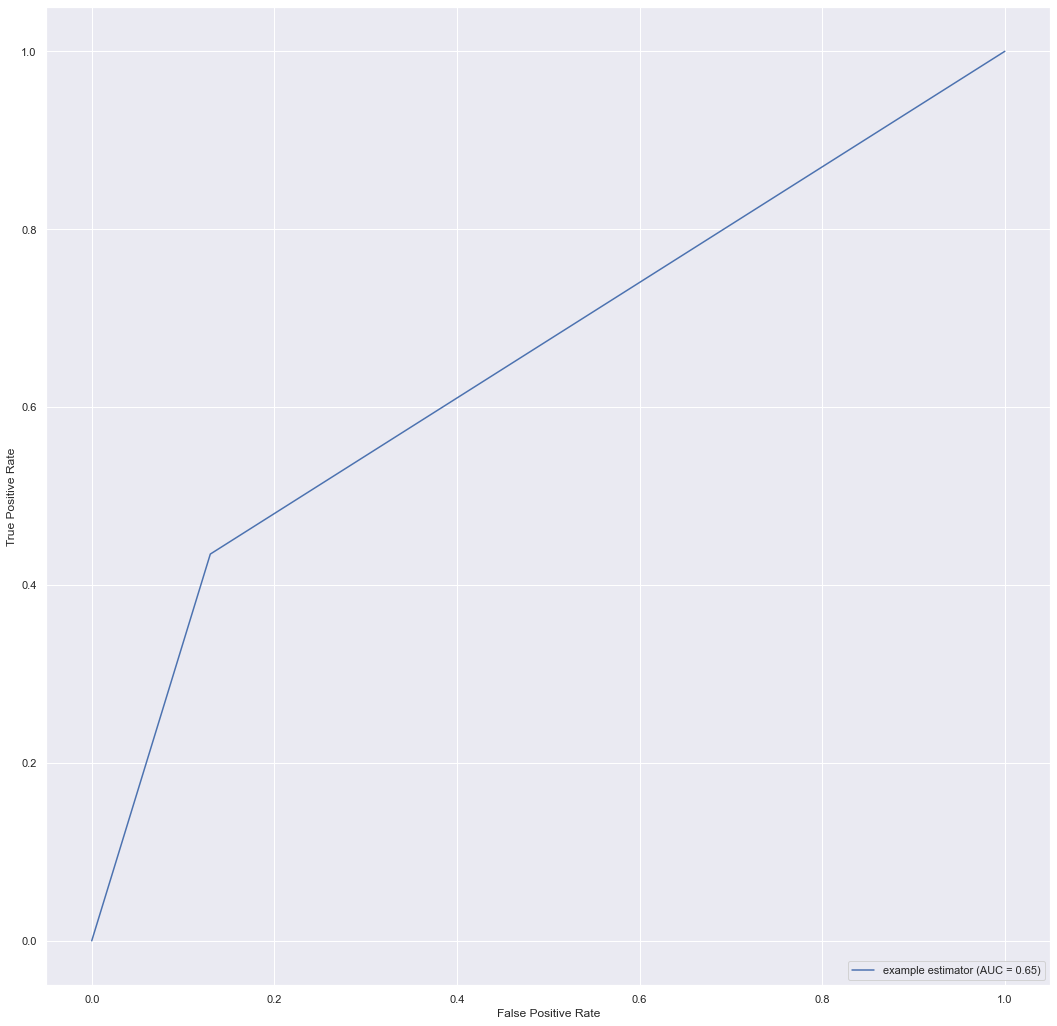

In [241]:
# Plot ROC-AUC curve
y = np.array(y_inf)
pred = np.array(y_inf_pred_xgb)

fpr, tpr, thresholds = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

plt.show()

SVM berhasil memprediksi berdasarkan ROC - AUC bernilai 0.67 hampir sesuai dengan pemodelan awal, namun pada nilai recall masih sangat kecil untuk memprediksi nilai unique 1 dikarenakan data Imbalance, pipeline belum menggunakan pipeline imblearnd dan training menggunakan pipeline sklearn.

# 11 - KESIMPULAN

## On Modeling

In [242]:
# Performace recall score after Metrics Test

grid_rs_test_dt = recall_score(y_test, best_pipe_dt.predict(X_test_num))
grid_rs_test_rf = recall_score(y_test, best_pipe_rf.predict(X_test_num))
grid_rs_test_xgb = recall_score(y_test, best_pipe_xgb.predict(X_test_num))

# Performace accuracy score after Metrics Test

grid_as_test_dt = accuracy_score(y_test, best_pipe_dt.predict(X_test_num))
grid_as_test_rf = accuracy_score(y_test, best_pipe_rf.predict(X_test_num))
grid_as_test_xgb = accuracy_score(y_test, best_pipe_xgb.predict(X_test_num))

In [243]:
# Showing the result of Cross Validation
cv_result.sort_values(by='mean_score', ascending=False)

,models,mean_score,stdev_score
6,XGB,0.8707,0.0109
3,RF,0.8694,0.0113
2,DT,0.7818,0.0138
4,KNN,0.7102,0.0085
1,SVM,0.6157,0.0126
5,NB,0.5845,0.0116
0,LR,0.5842,0.0103


Dari melakukan cross validation untuk mencari 3 model terbaik berdasarkan mean recall score maka didapatkan XGBoost Classifier, Random Forest, dan Decision Tree. Setelahnya akan dilakukan model evaluasi dengan hyperparameter tuning dengan grid search cv, lalu akan dilakukan evaluasi dengan beradasarkan hasil recall dan accuracy score sehingga didapatkan nilai sebagai berikut

In [244]:
# Showing the result of recall score after grid
grid_accuracy_conclusion = pd.DataFrame({'models':['DT', 'RF', 'XGB'], 
                    'accuracy score test after grid':[grid_as_test_dt, grid_as_test_rf, grid_as_test_xgb],
                    'recall score test after grid':[grid_rs_test_dt, grid_rs_test_rf, grid_rs_test_xgb]})
grid_accuracy_conclusion.sort_values(by='accuracy score test after grid', ascending=False)


,models,accuracy score test after grid,recall score test after grid
2,XGB,0.886945,0.868715
1,RF,0.886272,0.875698
0,DT,0.813594,0.773743


Maka didapatkan top 1 model diperoleh oleh mode XGBoost Classifier yang mana accuracy score lebih besar dari 2 model lainnya yaitu Random Forest dan Decision Tree, model XGBoost yang akan dilakukan prediksi model machine learning nantinya. Kenapa memilih XGBoost?

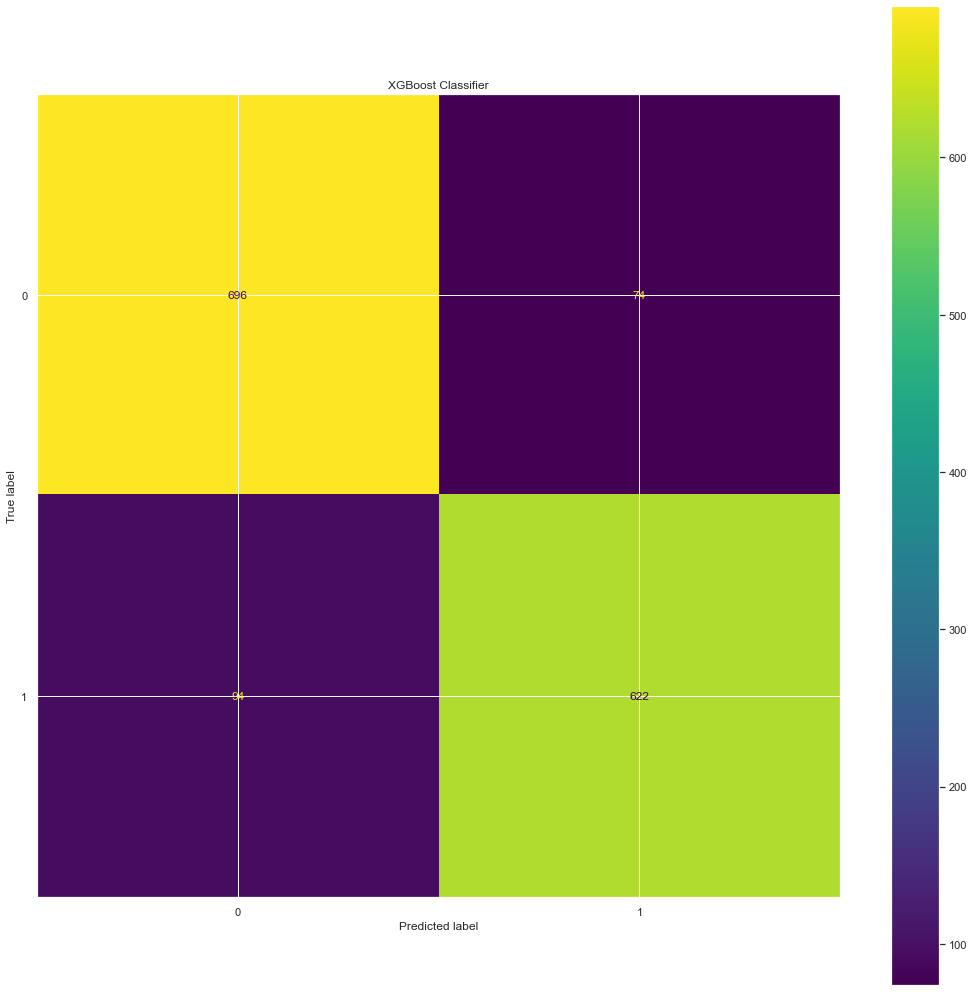

In [245]:
cm = confusion_matrix(y_test, y_pred_test_final_xgb, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()
plt.title("XGBoost Classifier")
plt.show()

Karena dari hasil accuracy score dilihat pada confusion matrix FN dan FP yang mana nilai eror tersebut imbang antara 74 dan 94 di model XGB ini eror yang didapatkan lebih sedikit daripada Decision Tree dan Random Forest. 

## Problems Prediction

- Deteksi default penting dalam bisnis penerbit kartu kredit
- Sebagai penerbit kartu kredit, kita harus bisa mendeteksi klien mana yang akan default. Mendeteksi klien default jauh lebih penting daripada mendeteksi klien non default.
- Tidak apa-apa untuk mendeteksi klien sebagai default meskipun ternyata tidak
- Sebaliknya, berbahaya, karena perusahaan mungkin tidak dapat mengambil mitigasi risiko yang diperlukan terhadap klien yang gagal bayar ini yang dapat berdampak pada arus kas perusahaan secara negatif dan berturut-turut, intinya
- Oleh karena itu, model kami yang masih buruk dalam mendeteksi beberapa klien yang merugikan itu perlu lebih ditingkatkan

## Future Improvement

Namun model XGB tersebut masih belum sempurna yang kemungkinan masih bias saat dilakukan prediksinya, maka perlu dikaji ulang distribusi datasetnya dengan menambahakan distribusinya dan menambahkan hasil yang seimbang di antara data classification binary 0 dan 1 pada default_payment_next_month.

## Conceptual Problems

Jawab pertanyaan berikut:

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
2. Apakah fungsi dari pruning pada Tree model?
3. Bagaimana cara memilih K yang optimal pada KNN?
4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

**Jawaban:**

1. Criterion adalah sebuah parameter dari algoritma Decision Tree yang terdiri dari “gini”, “entropy”, dan “log_loss”. Berfungsi untuk mengukur kualitas sebuah split pada sebuah data classification berdasarkan rumus matematikanya bisa dilihat pada link berikut : https://scikit-learn.org/stable/modules/tree.html#tree-mathematical-formulation.

2. Kita dapat pruning keputusan kita dengan menggunakan perolehan informasi baik pasca-pruning maupun pre-pruning. Dalam pre-pruning, kami memeriksa apakah perolehan informasi pada node tertentu lebih besar dari perolehan minimum. pasca-pruning, kami memangkas subtrees dengan perolehan informasi paling sedikit hingga kami mencapai jumlah daun yang diinginkan. Dengan kata lain pruning berfungsi untuk kompresi data untuk meminimalisir size terhadap cabang yang terlalu banyak pada algoritma decision tree. Referensi link sebagai berikut: https://www.educative.io/edpresso/what-is-decision-tree-pruning-and-how-is-it-done.

3. Dalam KNN, mencari nilai k tidaklah mudah. Nilai k yang kecil berarti bahwa noise akan memiliki pengaruh pada hasil yang lebih tinggi dan nilai k yang besar membuatnya memiliki large value secara komputasi. Dengan ini biasanya memilih sebagai bilangan ganjil jika jumlah kelasnya adalah 2 dan pendekatan sederhana lainnya untuk memilih k diatur k=sqrt(n).

4. Menentukan nilai dari memilih paramater secara acak oleh cros_val_score dan bisa jadi bukan yang terbaik.

5. - Accuracy : Ukuran kinerja yang paling intuitif dan itu hanyalah rasio pengamatan yang diprediksi dengan benar terhadap total pengamatan. Dengan rumus Accuracy = TP+TN/TP+FP+FN+TN
    - Precision : Rasio pengamatan positif yang diprediksi dengan benar dengan total pengamatan positif yang diprediksi. Dengan rumus Precision = TP/TP+FP
    - Recall : rasio pengamatan positif yang diprediksi dengan benar dengan semua pengamatan di kelas yang sebenarnya. Dengan rumus Recall = TP/TP+FN
    - F1-score : Rata-rata tertimbang dari Precision dan Recall. Oleh karena itu, skor ini memperhitungkan false positive  dan false negative. Secara intuitif tidak semudah memahami akurasi, tetapi F1 biasanya lebih berguna daripada akurasi, terutama jika Anda memiliki distribusi kelas yang tidak merata. Akurasi bekerja paling baik jika false positive dan false negative memiliki nilai yang sama. Dengan rumus F1 Score = 2*(Recall * Precision) / (Recall + Precision).\
Referensi link: https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

